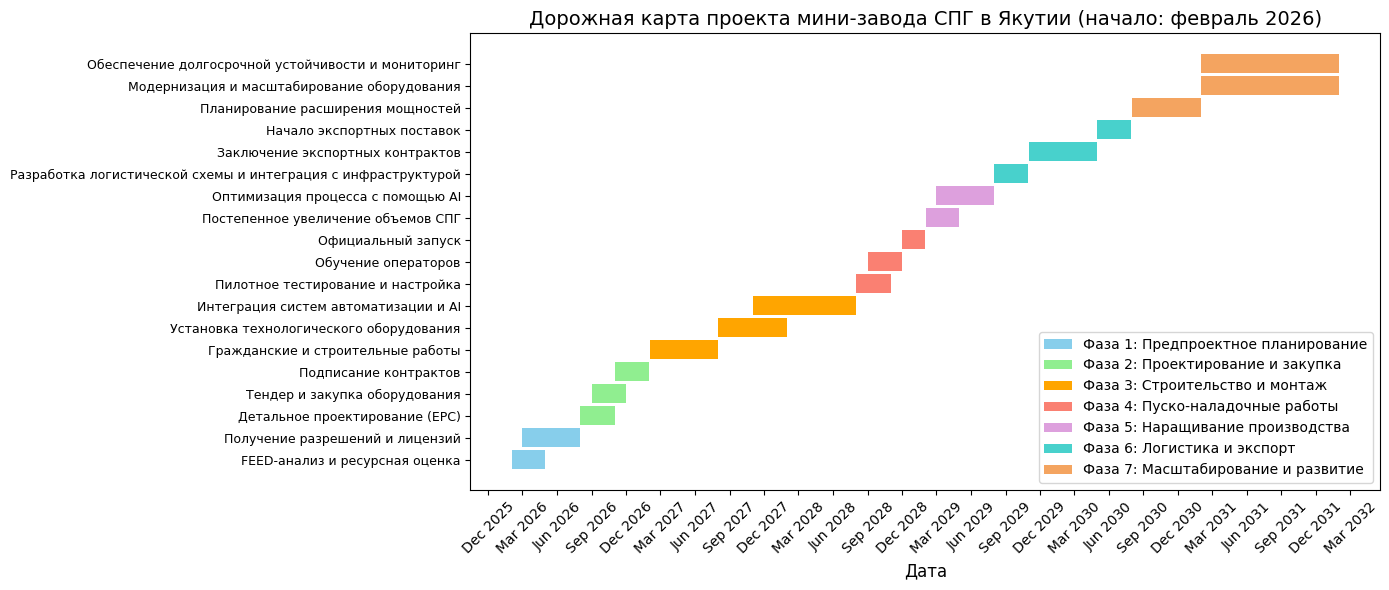

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Фазы проекта и цветовая схема
phase_colors = {
    "Фаза 1: Предпроектное планирование": "skyblue",
    "Фаза 2: Проектирование и закупка": "lightgreen",
    "Фаза 3: Строительство и монтаж": "orange",
    "Фаза 4: Пуско-наладочные работы": "salmon",
    "Фаза 5: Наращивание производства": "plum",
    "Фаза 6: Логистика и экспорт": "mediumturquoise",
    "Фаза 7: Масштабирование и развитие": "sandybrown"
}

# Новые даты сдвинуты на 13 месяцев относительно исходных
tasks = [
    # Фаза 1: Предпроектное планирование (Февраль 2026 – Август 2026)
    {"phase": "Фаза 1: Предпроектное планирование", "task": "FEED-анализ и ресурсная оценка", "start": "2026-02-01", "finish": "2026-04-30"},
    {"phase": "Фаза 1: Предпроектное планирование", "task": "Получение разрешений и лицензий", "start": "2026-03-01", "finish": "2026-07-31"},
    
    # Фаза 2: Проектирование и закупка (Август 2026 – Январь 2027)
    {"phase": "Фаза 2: Проектирование и закупка", "task": "Детальное проектирование (EPC)", "start": "2026-08-01", "finish": "2026-10-31"},
    {"phase": "Фаза 2: Проектирование и закупка", "task": "Тендер и закупка оборудования", "start": "2026-09-01", "finish": "2026-11-30"},
    {"phase": "Фаза 2: Проектирование и закупка", "task": "Подписание контрактов", "start": "2026-11-01", "finish": "2027-01-31"},
    
    # Фаза 3: Строительство и монтаж (Февраль 2027 – Январь 2028)
    {"phase": "Фаза 3: Строительство и монтаж", "task": "Гражданские и строительные работы", "start": "2027-02-01", "finish": "2027-07-31"},
    {"phase": "Фаза 3: Строительство и монтаж", "task": "Установка технологического оборудования", "start": "2027-08-01", "finish": "2028-01-31"},
    {"phase": "Фаза 3: Строительство и монтаж", "task": "Интеграция систем автоматизации и AI", "start": "2027-11-01", "finish": "2028-07-31"},
    
    # Фаза 4: Пуско-наладочные работы (Август 2028 – Январь 2029)
    {"phase": "Фаза 4: Пуско-наладочные работы", "task": "Пилотное тестирование и настройка", "start": "2028-08-01", "finish": "2028-10-31"},
    {"phase": "Фаза 4: Пуско-наладочные работы", "task": "Обучение операторов", "start": "2028-09-01", "finish": "2028-11-30"},
    {"phase": "Фаза 4: Пуско-наладочные работы", "task": "Официальный запуск", "start": "2028-12-01", "finish": "2029-01-31"},
    
    # Фаза 5: Наращивание производства и оптимизация (Февраль 2029 – Июль 2029)
    {"phase": "Фаза 5: Наращивание производства", "task": "Постепенное увеличение объемов СПГ", "start": "2029-02-01", "finish": "2029-04-30"},
    {"phase": "Фаза 5: Наращивание производства", "task": "Оптимизация процесса с помощью AI", "start": "2029-03-01", "finish": "2029-07-31"},
    
    # Фаза 6: Логистика и экспорт (Август 2029 – Июль 2030)
    {"phase": "Фаза 6: Логистика и экспорт", "task": "Разработка логистической схемы и интеграция с инфраструктурой", "start": "2029-08-01", "finish": "2029-10-31"},
    {"phase": "Фаза 6: Логистика и экспорт", "task": "Заключение экспортных контрактов", "start": "2029-11-01", "finish": "2030-04-30"},
    {"phase": "Фаза 6: Логистика и экспорт", "task": "Начало экспортных поставок", "start": "2030-05-01", "finish": "2030-07-31"},
    
    # Фаза 7: Масштабирование и развитие (Август 2030 – Декабрь 2031)
    {"phase": "Фаза 7: Масштабирование и развитие", "task": "Планирование расширения мощностей", "start": "2030-08-01", "finish": "2031-01-31"},
    {"phase": "Фаза 7: Масштабирование и развитие", "task": "Модернизация и масштабирование оборудования", "start": "2031-02-01", "finish": "2032-01-31"},
    {"phase": "Фаза 7: Масштабирование и развитие", "task": "Обеспечение долгосрочной устойчивости и мониторинг", "start": "2031-02-01", "finish": "2032-01-31"}
]
й
# Преобразуем строки с датами в объекты datetime и вычисляем продолжительность
for task in tasks:
    task["start_dt"] = datetime.strptime(task["start"], "%Y-%m-%d")
    task["finish_dt"] = datetime.strptime(task["finish"], "%Y-%m-%d")
    task["duration"] = (task["finish_dt"] - task["start_dt"]).days

# Настройка фигуры и осей - компактнее по оси Y
fig, ax = plt.subplots(figsize=(14, 6))
yticks = []
ylabels = []
bar_height = 3
gap = 0.5

# Рисуем полосы для каждой подзадачи с цветами по фазам
for i, task in enumerate(tasks):
    y = i * (bar_height + gap)
    yticks.append(y + bar_height / 2)
    ylabels.append(task["task"])
    color = phase_colors.get(task["phase"], "gray")
    ax.broken_barh(
        [(mdates.date2num(task["start_dt"]), task["duration"])],
        (y, bar_height),
        facecolors=color
    )

# Форматируем ось X для дат
ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.xticks(rotation=45)

ax.set_yticks(yticks)
ax.set_yticklabels(ylabels, fontsize=9)
ax.set_xlabel("Дата", fontsize=12)
ax.set_title("Дорожная карта проекта мини‑завода СПГ в Якутии (начало: февраль 2026)", fontsize=14)

# Легенда в правом нижнем углу
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, label=phase) for phase, color in phase_colors.items()]
ax.legend(handles=legend_elements, loc="lower right", fontsize=10)

plt.tight_layout()
plt.show()


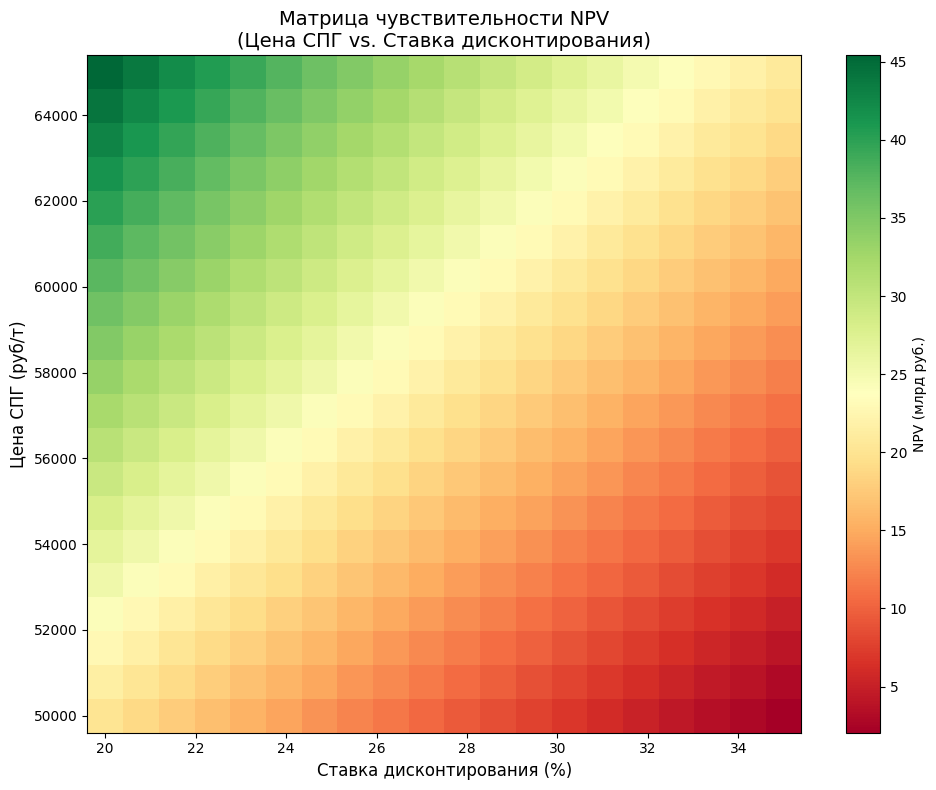

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------
# 1. Распределение излишков газа и фактического производства СПГ по месяцам
# ---------------------------
# Данные: Излишки газа (млн м³/мес) и технический потенциал производства (тонн СПГ/час)
excess_gas = np.array([0, 28, 77, 138, 192, 226, 248, 231, 182, 116, 44, 0])  # млн м³/мес
production_tph = np.array([0, 21.167, 53.532, 98.779, 133.829, 161.997, 172.066, 160.595, 130.388, 80.298, 31.609, 0])  # т/час
hours_per_month = 720

# Технический потенциал производства (тонн/мес)
tech_production = production_tph * hours_per_month

# Газ, необходимый для генерации электроэнергии: 1 т СПГ требует 840 кВт⋅ч, при 3 кВт⋅ч/м³ → 840/3 = 280 м³ на 1 т
gas_per_t = 280  # м³/т
gas_for_electricity_m3 = tech_production * gas_per_t
gas_for_electricity_mln = gas_for_electricity_m3 / 1e6  # в млн м³

# Свободный газ для СПГ = излишки - газ на электроэнергию
free_gas = excess_gas - gas_for_electricity_mln

# Возможное производство СПГ по газу (т): перевод свободного газа (млн м³) в тонны = (free_gas*1e6) / 280
max_prod_from_gas = np.where(free_gas > 0, free_gas * 1e6 / gas_per_t, 0)

# Фактическое производство = минимум между техническим потенциалом и доступным по газу
actual_production = np.minimum(tech_production, max_prod_from_gas)
annual_production = actual_production.sum()  # т/год

print(f"Годовое фактическое производство СПГ: {annual_production:,.0f} т")

df_month = pd.DataFrame({
    "Месяц": np.arange(1, 13),
    "Излишки газа (млн м³)": excess_gas,
    "Тех. потенциал (т)": tech_production,
    "Газ на электроэнергию (млн м³)": gas_for_electricity_mln,
    "Свободный газ (млн м³)": free_gas,
    "Макс. производство по газу (т)": max_prod_from_gas,
    "Факт. производство СПГ (т)": actual_production
})
print("\nРаспределение газа и производство СПГ по месяцам:")
print(df_month.to_string(index=False, justify="center"))

# ---------------------------
# 2. Экономические параметры (базовый сценарий)
# ---------------------------
price_base = 55000          # руб/т, базовая цена СПГ
CAPEX_base = 50e9           # CAPEX = 50 млрд руб.
OPEX_factor_base = 0.10     # Фиксированные операционные расходы = 10% от CAPEX
tax_rate = 0.25             # Налог на доход 25%
property_tax = CAPEX_base * 0.02  # Налог на имущество = 2% от CAPEX (1 млрд руб.)
disc_rate_base = 0.25       # Ставка дисконтирования = 25%

annual_revenue = annual_production * price_base
annual_OPEX = CAPEX_base * OPEX_factor_base
annual_EBITDA = annual_revenue - annual_OPEX
income_tax = annual_EBITDA * tax_rate if annual_EBITDA > 0 else 0
after_tax_EBITDA = annual_EBITDA - income_tax
annual_CF = after_tax_EBITDA - property_tax

years = np.arange(0, 6)
cash_flows = np.zeros(6)
cash_flows[0] = -CAPEX_base
cash_flows[1:] = annual_CF

# Функция расчёта NPV
def npv_value(CAPEX, price, OPEX_factor, disc_rate, production):
    revenue = production * price
    EBITDA = revenue - (CAPEX * OPEX_factor)
    after_tax = EBITDA * (1 - tax_rate)
    CF = after_tax - (CAPEX * 0.02)
    CFs = np.zeros(6)
    CFs[0] = -CAPEX
    CFs[1:] = CF
    return sum(CFs[t] / ((1 + disc_rate) ** t) for t in range(len(CFs)))

base_NPV = npv_value(CAPEX_base, price_base, OPEX_factor_base, disc_rate_base, annual_production)
print(f"\nБазовый NPV: {base_NPV/1e9:.2f} млрд руб.")

# ---------------------------
# 3. Поиск критических точек (опорных значений)
# ---------------------------
def find_critical(param_name, lower, upper, direction, tol=1e-3, max_iter=100, **kwargs):
    iter_count = 0
    while (upper - lower) > tol and iter_count < max_iter:
        mid = (lower + upper) / 2
        if param_name == "CAPEX":
            npv_mid = npv_value(mid, kwargs["price"], kwargs["OPEX_factor"], kwargs["disc_rate"], kwargs["production"])
        elif param_name == "disc_rate":
            npv_mid = npv_value(kwargs["CAPEX"], kwargs["price"], kwargs["OPEX_factor"], mid, kwargs["production"])
        elif param_name == "OPEX_factor":
            npv_mid = npv_value(kwargs["CAPEX"], kwargs["price"], mid, kwargs["disc_rate"], kwargs["production"])
        elif param_name == "price":
            npv_mid = npv_value(kwargs["CAPEX"], mid, kwargs["OPEX_factor"], kwargs["disc_rate"], kwargs["production"])
        else:
            raise ValueError("Неизвестный параметр")
        
        # Направление "up": увеличение параметра снижает NPV, т.е. ищем такое значение, при котором NPV становится 0,
        # если npv_mid >= 0, продолжаем увеличение (lower = mid); если npv_mid < 0, уменьшаем верхнюю границу.
        if direction == "up":
            if npv_mid >= 0:
                lower = mid
            else:
                upper = mid
        # Направление "down": уменьшение параметра снижает NPV, поэтому, если npv_mid >= 0, upper = mid, иначе lower = mid.
        elif direction == "down":
            if npv_mid >= 0:
                upper = mid
            else:
                lower = mid
        else:
            raise ValueError("Direction must be 'up' or 'down'")
        iter_count += 1
    return (lower + upper) / 2

# Критические точки:
# CAPEX: увеличиваем (наращиваем затраты) до тех пор, пока NPV не занулится.
critical_CAPEX = find_critical("CAPEX", CAPEX_base, CAPEX_base*2, "up", price=price_base, OPEX_factor=OPEX_factor_base, disc_rate=disc_rate_base, production=annual_production)
# Ставка дисконтирования: увеличиваем до тех пор, пока NPV не станет 0.
critical_disc_rate = find_critical("disc_rate", disc_rate_base, 0.50, "up", CAPEX=CAPEX_base, price=price_base, OPEX_factor=OPEX_factor_base, production=annual_production)
# OPEX_factor: увеличиваем до тех пор, пока NPV не занулится.
critical_OPEX_factor = find_critical("OPEX_factor", OPEX_factor_base, 0.20, "up", CAPEX=CAPEX_base, price=price_base, disc_rate=disc_rate_base, production=annual_production)
# Цена СПГ: уменьшаем до тех пор, пока NPV не станет равным 0.
critical_price = find_critical("price", 30000, price_base, "down", CAPEX=CAPEX_base, OPEX_factor=OPEX_factor_base, disc_rate=disc_rate_base, production=annual_production)

table_data = {
    "Параметр": ["CAPEX (млрд руб.)", "Ставка дисконтирования (%)", "OPEX (фактор от CAPEX)", "Цена СПГ (руб/т)"],
    "Сейчас": [CAPEX_base/1e9, disc_rate_base*100, OPEX_factor_base, price_base],
    "Критическое значение": [critical_CAPEX/1e9, critical_disc_rate*100, critical_OPEX_factor, critical_price]
}
df_critical = pd.DataFrame(table_data)
print("\nКритические точки проекта (опорные значения):")
print(df_critical.to_string(index=False, justify="center"))

# ---------------------------
# 4. Матрица чувствительности NPV
# ---------------------------
# Расширенные границы: Цена СПГ от 50,000 до 65,000 руб./т, ставка дисконтирования от 20% до 35%
price_range = np.linspace(50000, 65000, 20)
disc_rate_range = np.linspace(0.20, 0.35, 20)

NPV_matrix = np.zeros((len(price_range), len(disc_rate_range)))
for i, p in enumerate(price_range):
    for j, dr in enumerate(disc_rate_range):
        NPV_matrix[i, j] = npv_value(CAPEX_base, p, OPEX_factor_base, dr, annual_production) / 1e9  # млрд руб.

# ---------------------------
# 5. Основные экономические показатели (базовый сценарий) и график NPV
# ---------------------------
base_cash_flows = np.zeros(6)
base_cash_flows[0] = -CAPEX_base
base_CF = after_tax_EBITDA - property_tax  # годовой CF базового сценария
base_cash_flows[1:] = base_CF

NPV = sum(base_cash_flows[t] / ((1+disc_rate_base)**t) for t in range(len(base_cash_flows)))
coeffs = base_cash_flows[::-1]
roots = np.roots(coeffs)
real_roots = roots[np.isreal(roots)].real
valid_roots = real_roots[(real_roots > 0) & (real_roots < 1)]
IRR = (1/valid_roots[0]) - 1 if valid_roots.size > 0 else None
discounted_cfs = np.array([base_cash_flows[t] / ((1+disc_rate_base)**t) for t in range(len(base_cash_flows))])
cumulative_discounted = np.cumsum(discounted_cfs)
if any(cumulative_discounted >= 0):
    DPP = np.interp(0, cumulative_discounted[::-1], np.arange(len(base_cash_flows))[::-1])
else:
    DPP = None
PI = sum(base_cash_flows[1:] / ((1+disc_rate_base)**np.arange(1, len(base_cash_flows)))) / CAPEX_base
ROI = (np.sum(base_cash_flows[1:]) / CAPEX_base) * 100 / 5

print("\nОсновные экономические показатели проекта (базовый сценарий):")
print(f"NPV: {NPV/1e9:.2f} млрд руб.")
if IRR is not None:
    print(f"IRR: {IRR*100:.2f}%")
else:
    print("IRR: Не удалось определить")
if DPP is not None:
    print(f"DPP: {DPP:.2f} года")
else:
    print("DPP: Не достигнута окупаемость")
print(f"PI: {PI:.2f}")
print(f"ROI: {ROI:.2f}%")

# График накопленного дисконтированного потока (NPV) по годам
years_list = np.arange(0, 6)
cumulative_discounted_values = np.cumsum([base_cash_flows[t] / ((1+disc_rate_base)**t) for t in range(len(base_cash_flows))])

plt.figure(figsize=(10,6))
plt.plot(years_list, cumulative_discounted_values/1e9, marker='o', linestyle='-')
plt.title("Накопленный дисконтированный денежный поток (NPV) по годам", fontsize=14)
plt.xlabel("Год", fontsize=12)
plt.ylabel("Дисконтированный поток (млрд руб.)", fontsize=12)
plt.grid(True)
plt.xticks(years_list)
plt.tight_layout()
plt.show()

# График матрицы чувствительности NPV (по цене и ставке дисконтирования)
plt.figure(figsize=(10,8))
c = plt.pcolormesh(disc_rate_range*100, price_range, NPV_matrix, shading='auto', cmap='RdYlGn')
plt.colorbar(c, label="NPV (млрд руб.)")
plt.xlabel("Ставка дисконтирования (%)", fontsize=12)
plt.ylabel("Цена СПГ (руб/т)", fontsize=12)
plt.title("Матрица чувствительности NPV\n(Цена СПГ vs. Ставка дисконтирования)", fontsize=14)
plt.tight_layout()
plt.show()


Распределение потоков подземного хранилища газа (ПХГ):
 Месяц  Поток ПХГ (млн м³/мес)
   1             -128         
   2             -100         
   3              -51         
   4               10         
   5               65         
   6               98         
   7              120         
   8              103         
   9               54         
  10              -12         
  11              -84         
  12             -128         

Годовое производство СПГ (альтернативный вариант): 1,102,371 т

Таблица денежных потоков (альтернативный вариант):
 Год  Денежный поток (руб.)  Дисконтированный поток (руб.)  Кумулятивный дисконтированный поток (руб.)
 0      -55,000,000,000            -55,000,000,000                       -55,000,000,000              
 1       39,872,790,951             31,898,232,761                       -23,101,767,239              
 2       39,872,790,951             25,518,586,209                         2,416,818,970              
 3       39,87

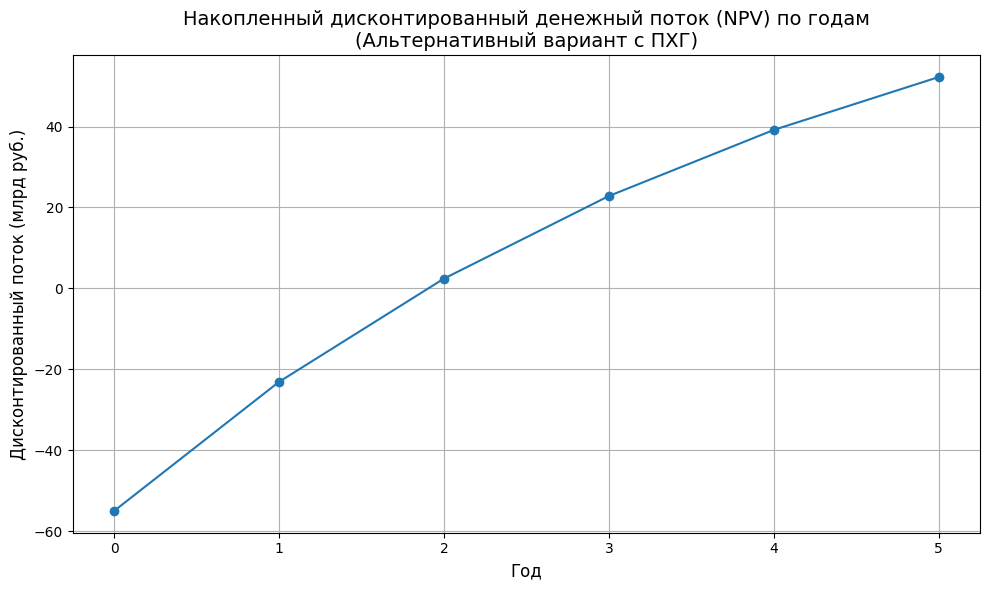

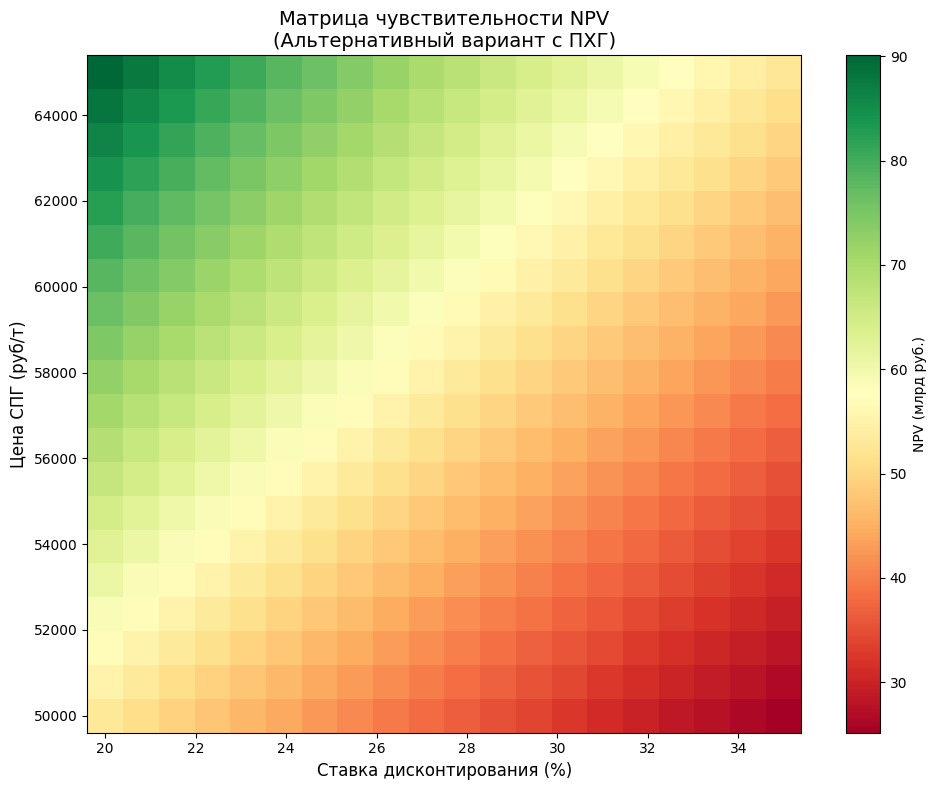

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------
# 1. Распределение потоков ПХГ по месяцам
# ---------------------------
# Значения потоков ПХГ (млн м³/мес): положительные – закачка в хранилище, отрицательные – забор из хранилища
PHG_flows = np.array([-127.875, -100.375, -50.875, 9.625, 64.625, 97.625, 119.625, 103.125, 53.625, -12.375, -83.875, -127.875])
months = np.arange(1, 13)
df_PHG = pd.DataFrame({
    "Месяц": months,
    "Поток ПХГ (млн м³/мес)": PHG_flows
})
print("Распределение потоков подземного хранилища газа (ПХГ):")
print(df_PHG.to_string(index=False, justify="center"))

# ---------------------------
# 2. Производство СПГ (альтернативный вариант с ПХГ)
# ---------------------------
# Производительность завода (фиксированная) = 127.5892002 т/час
prod_rate_tph = 127.5892002
hours_per_month = 720
monthly_production = prod_rate_tph * hours_per_month  # т/мес
annual_production = monthly_production * 12  # т/год
print(f"\nГодовое производство СПГ (альтернативный вариант): {annual_production:,.0f} т")

# ---------------------------
# 3. Экономика проекта (альтернативный вариант)
# ---------------------------
# Параметры базового сценария (альтернативный вариант)
price_base = 55000            # руб/т, цена СПГ
CAPEX_base = 50e9             # базовый CAPEX СПГ завода, 50 млрд руб.
# Дополнительные инвестиции в ПХГ:
CAPEX_PHG = 5e9               # 5 млрд руб.
CAPEX_alt = CAPEX_base + CAPEX_PHG  # Итого CAPEX = 55 млрд руб.

# Фиксированные операционные расходы базового завода = 10% от 50 млрд = 5 млрд руб.
# Дополнительные OPEX на ПХГ = 1 млрд руб.
OPEX_alt = (CAPEX_base * 0.10) + 1e9  # 5 + 1 = 6 млрд руб./год

tax_rate = 0.25               # 25% налог на доход
property_tax = CAPEX_alt * 0.02  # 2% от CAPEX_alt (55e9*0.02 = 1.1 млрд руб./год)
disc_rate_base = 0.25         # 25% ставка дисконтирования

# Годовая выручка
annual_revenue_alt = annual_production * price_base
# Операционные расходы (только фиксированные)
annual_OPEX_alt = OPEX_alt
# EBITDA
annual_EBITDA_alt = annual_revenue_alt - annual_OPEX_alt
income_tax_alt = annual_EBITDA_alt * tax_rate if annual_EBITDA_alt > 0 else 0
after_tax_EBITDA_alt = annual_EBITDA_alt - income_tax_alt
# Годовой чистый денежный поток (CF)
annual_CF_alt = after_tax_EBITDA_alt - property_tax

# Денежные потоки проекта (5 лет, год 0 = -CAPEX_alt)
years = np.arange(0, 6)
cash_flows_alt = np.zeros(6)
cash_flows_alt[0] = -CAPEX_alt
cash_flows_alt[1:] = annual_CF_alt

# Вывод таблицы денежных потоков альтернативного проекта
data_alt = {
    "Год": years,
    "Денежный поток (руб.)": cash_flows_alt,
    "Дисконтированный поток (руб.)": [cash_flows_alt[t] / ((1+disc_rate_base)**t) for t in range(len(cash_flows_alt))],
    "Кумулятивный дисконтированный поток (руб.)": np.cumsum([cash_flows_alt[t] / ((1+disc_rate_base)**t) for t in range(len(cash_flows_alt))])
}
df_year_alt = pd.DataFrame(data_alt)
pd.options.display.float_format = "{:,.0f}".format
print("\nТаблица денежных потоков (альтернативный вариант):")
print(df_year_alt.to_string(index=False, justify="center"))

# Функция расчёта NPV для альтернативного проекта
def npv_value_alt(CAPEX, price, OPEX_factor, disc_rate, production):
    revenue = production * price
    EBITDA = revenue - (CAPEX * OPEX_factor)
    after_tax = EBITDA * (1 - tax_rate)
    CF = after_tax - (CAPEX * 0.02)
    CFs = np.zeros(6)
    CFs[0] = -CAPEX
    CFs[1:] = CF
    return sum(CFs[t] / ((1 + disc_rate) ** t) for t in range(len(CFs)))

# Основной NPV альтернативного проекта
NPV_alt = sum(cash_flows_alt[t] / ((1+disc_rate_base)**t) for t in range(len(cash_flows_alt)))
print(f"\nБазовый NPV (альтернативный вариант): {NPV_alt/1e9:.2f} млрд руб.")

# Основные экономические показатели
# IRR
coeffs_alt = cash_flows_alt[::-1]
roots_alt = np.roots(coeffs_alt)
real_roots_alt = roots_alt[np.isreal(roots_alt)].real
valid_roots_alt = real_roots_alt[(real_roots_alt > 0) & (real_roots_alt < 1)]
IRR_alt = (1/valid_roots_alt[0]) - 1 if valid_roots_alt.size > 0 else None
# Discounted Payback Period (DPP)
discounted_cfs_alt = np.array([cash_flows_alt[t] / ((1+disc_rate_base)**t) for t in range(len(cash_flows_alt))])
cumulative_discounted_alt = np.cumsum(discounted_cfs_alt)
if any(cumulative_discounted_alt >= 0):
    DPP_alt = np.interp(0, cumulative_discounted_alt[::-1], np.arange(len(cash_flows_alt))[::-1])
else:
    DPP_alt = None
# Profitability Index (PI)
PI_alt = sum(cash_flows_alt[1:] / ((1+disc_rate_base)**np.arange(1, len(cash_flows_alt)))) / CAPEX_alt
# ROI – среднегодовая рентабельность инвестиций
ROI_alt = (np.sum(cash_flows_alt[1:]) / CAPEX_alt) * 100 / 5

print("\nОсновные экономические показатели проекта (альтернативный вариант):")
print(f"NPV: {NPV_alt/1e9:.2f} млрд руб.")
if IRR_alt is not None:
    print(f"IRR: {IRR_alt*100:.2f}%")
else:
    print("IRR: Не удалось определить")
if DPP_alt is not None:
    print(f"DPP: {DPP_alt:.2f} года")
else:
    print("DPP: Не достигнута окупаемость")
print(f"PI: {PI_alt:.2f}")
print(f"ROI: {ROI_alt:.2f}%")

# ---------------------------
# 4. Поиск критических точек для альтернативного варианта
# ---------------------------
def find_critical(param_name, lower, upper, direction, tol=1e-3, max_iter=100, **kwargs):
    iter_count = 0
    while (upper - lower) > tol and iter_count < max_iter:
        mid = (lower + upper) / 2
        if param_name == "CAPEX":
            npv_mid = npv_value_alt(mid, kwargs["price"], kwargs["OPEX_factor"], kwargs["disc_rate"], kwargs["production"])
        elif param_name == "disc_rate":
            npv_mid = npv_value_alt(kwargs["CAPEX"], kwargs["price"], kwargs["OPEX_factor"], mid, kwargs["production"])
        elif param_name == "OPEX_factor":
            npv_mid = npv_value_alt(kwargs["CAPEX"], kwargs["price"], mid, kwargs["disc_rate"], kwargs["production"])
        elif param_name == "price":
            npv_mid = npv_value_alt(kwargs["CAPEX"], mid, kwargs["OPEX_factor"], kwargs["disc_rate"], kwargs["production"])
        else:
            raise ValueError("Неизвестный параметр")
        
        if direction == "up":
            if npv_mid >= 0:
                lower = mid
            else:
                upper = mid
        elif direction == "down":
            if npv_mid >= 0:
                upper = mid
            else:
                lower = mid
        else:
            raise ValueError("Direction must be 'up' or 'down'")
        iter_count += 1
    return (lower + upper) / 2

# Критические точки для альтернативного варианта:
critical_CAPEX_alt = find_critical("CAPEX", CAPEX_alt, CAPEX_alt*2, "up", price=price_base, OPEX_factor=OPEX_factor_base, disc_rate=disc_rate_base, production=annual_production)
critical_disc_rate_alt = find_critical("disc_rate", disc_rate_base, 0.50, "up", CAPEX=CAPEX_alt, price=price_base, OPEX_factor=OPEX_factor_base, production=annual_production)
critical_OPEX_factor_alt = find_critical("OPEX_factor", OPEX_factor_base, 0.20, "up", CAPEX=CAPEX_alt, price=price_base, disc_rate=disc_rate_base, production=annual_production)
critical_price_alt = find_critical("price", 30000, price_base, "down", CAPEX=CAPEX_alt, OPEX_factor=OPEX_factor_base, disc_rate=disc_rate_base, production=annual_production)

table_data_alt = {
    "Параметр": ["CAPEX (млрд руб.)", "Ставка дисконтирования (%)", "OPEX (фактор от CAPEX)", "Цена СПГ (руб/т)"],
    "Сейчас": [CAPEX_alt/1e9, disc_rate_base*100, OPEX_factor_base, price_base],
    "Критическое значение": [critical_CAPEX_alt/1e9, critical_disc_rate_alt*100, critical_OPEX_factor_alt, critical_price_alt]
}
df_critical_alt = pd.DataFrame(table_data_alt)
print("\nКритические точки проекта (альтернативный вариант):")
print(df_critical_alt.to_string(index=False, justify="center"))

# ---------------------------
# 5. Графики для альтернативного варианта
# ---------------------------
# График накопленного дисконтированного денежного потока (NPV) по годам
years_list = np.arange(0, 6)
cumulative_discounted_alt = np.cumsum([cash_flows_alt[t] / ((1+disc_rate_base)**t) for t in range(len(cash_flows_alt))])
plt.figure(figsize=(10,6))
plt.plot(years_list, cumulative_discounted_alt/1e9, marker='o', linestyle='-')
plt.title("Накопленный дисконтированный денежный поток (NPV) по годам\n(Альтернативный вариант с ПХГ)", fontsize=14)
plt.xlabel("Год", fontsize=12)
plt.ylabel("Дисконтированный поток (млрд руб.)", fontsize=12)
plt.grid(True)
plt.xticks(years_list)
plt.tight_layout()
plt.show()

# График матрицы чувствительности NPV (по цене и ставке дисконтирования) для альтернативного варианта
price_range_alt = np.linspace(50000, 65000, 20)
disc_rate_range_alt = np.linspace(0.20, 0.35, 20)
NPV_matrix_alt = np.zeros((len(price_range_alt), len(disc_rate_range_alt)))
for i, p in enumerate(price_range_alt):
    for j, dr in enumerate(disc_rate_range_alt):
        NPV_matrix_alt[i, j] = npv_value_alt(CAPEX_alt, p, OPEX_factor_base, dr, annual_production) / 1e9  # млрд руб.

plt.figure(figsize=(10,8))
c = plt.pcolormesh(disc_rate_range_alt*100, price_range_alt, NPV_matrix_alt, shading='auto', cmap='RdYlGn')
plt.colorbar(c, label="NPV (млрд руб.)")
plt.xlabel("Ставка дисконтирования (%)", fontsize=12)
plt.ylabel("Цена СПГ (руб/т)", fontsize=12)
plt.title("Матрица чувствительности NPV\n(Альтернативный вариант с ПХГ)", fontsize=14)
plt.tight_layout()
plt.show()


Базовый вариант – Годовое производство СПГ: 1,062,859 т
Альтернативный вариант (с ПХГ) – Годовое производство СПГ: 1,102,371 т
Третий вариант – Годовая выручка от конденсата: 1.10 млрд руб.

Экономические показатели проекта за 50 лет (Базовый вариант):
NPV: 6.44 млрд руб.
IRR: 27.69%
DPP: 13.25 лет
PI: 1.04
ROI: 18.58%

Экономические показатели проекта за 50 лет (Альтернативный вариант с ПХГ):
NPV: 45.93 млрд руб.
IRR: 57.48%
DPP: 5.39 лет
PI: 1.43
ROI: 31.85%

Экономические показатели проекта за 50 лет (Третий вариант с канадским сайклингом):
NPV: 43.73 млрд руб.
IRR: 43.95%
DPP: 6.60 лет
PI: 1.27
ROI: 26.37%

Экономические показатели проекта за 50 лет (Четвертый вариант – канадский сайклинг, без NDPI, с налогом 10%):
NPV: 65.24 млрд руб.
IRR: 54.66%
DPP: 5.56 лет
PI: 1.41
ROI: 31.47%


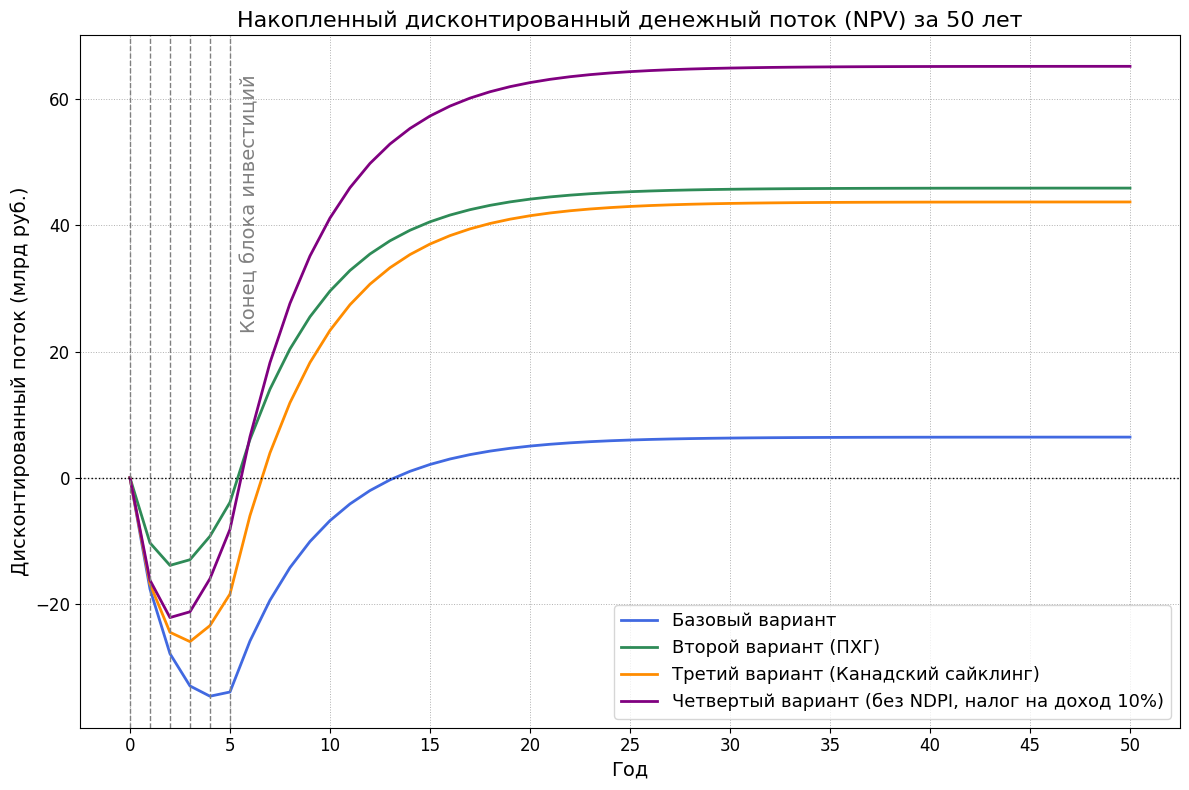

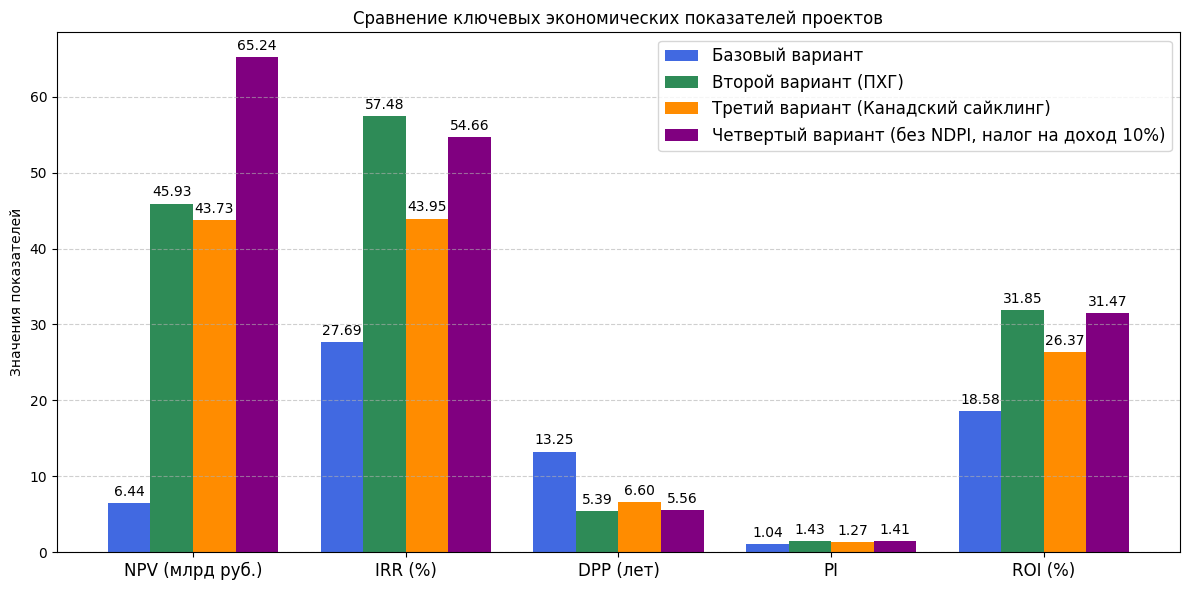

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ==============================
# 1. Распределение газа и производство СПГ
# ==============================
# Для базового варианта:
gas_excess = np.array([0, 27.5, 77, 137.5, 192.5, 225.5, 247.5, 231, 181.5, 115.5, 44, 0])  # млн м³/мес
conversion_factor = 1e6 / 1392  # т СПГ на 1 млн м³ (~718.4 т)
monthly_prod_base = gas_excess * conversion_factor  # т/мес
production_base = monthly_prod_base.sum()  # т/год

print(f"Базовый вариант – Годовое производство СПГ: {production_base:,.0f} т")

# Альтернативный вариант (с ПХГ)
prod_rate_alt_tph = 127.5892002  # т/час (фиксированная мощность)
hours_per_month = 720
monthly_prod_alt = prod_rate_alt_tph * hours_per_month  # т/мес
production_alt = monthly_prod_alt * 12  # т/год

print(f"Альтернативный вариант (с ПХГ) – Годовое производство СПГ: {production_alt:,.0f} т")

# Третий вариант (с канадским сайклингом):
gas_excess_extended = gas_excess * 1.35  # добыча на 35% выше базовой
monthly_prod_extended = gas_excess_extended * conversion_factor  # т/мес
production_extended = monthly_prod_extended.sum()  # т/год

# ==============================
# 2. Этапное наращивание мощности (50-летний анализ)
# ==============================
def ramp_factor(year):
    return min(year / 5, 1)

# ==============================
# 3. Экономические параметры и налоговые ставки
# ==============================
price = 55000             # руб/т, базовая цена СПГ
tax_rate = 0.25           # для первых 3 вариантов – 25%
NDPI_rate = 48.72         # руб/т, налог на добычу полезных ископаемых
disc_rate_base = 0.25     # базовая ставка дисконтирования 25%

# Параметры для базового варианта:
capacity_base_tph = 240
CAPEX_base = capacity_base_tph * 600e6   # ≈ 144 млрд руб.
OPEX_base = CAPEX_base * 0.10            # 10% от CAPEX
dep_base = CAPEX_base / 50               # амортизация при 50-летнем горизонте
property_tax_base = CAPEX_base * 0.02     # 2% от CAPEX

# Параметры для альтернативного варианта (с ПХГ):
CAPEX_eq_alt = 130 * 600e6
CAPEX_PHG = 30e9
CAPEX_alt = CAPEX_eq_alt + CAPEX_PHG     # 78 + 30 = 108 млрд руб.
OPEX_alt = (CAPEX_eq_alt * 0.10) + 1e9     # 10% от оборудования + 1 млрд руб. эксплуатационных затрат
dep_alt = CAPEX_alt / 20
property_tax_alt = CAPEX_alt * 0.02

# Параметры для третьего варианта (с канадским сайклингом):
CAPEX_eq_extended = 180 * 600e6 * 1.35  # мощность завода для третьего варианта
CAPEX_extended = CAPEX_eq_extended + 10e9 + 5e9  # доп. инвестиции на канадский сайклинг + расширение мощностей
OPEX_extended = (CAPEX_eq_extended * 0.10) + 0.5e9  # 10% от оборудования + доп. затраты на сайклинг
dep_extended = CAPEX_extended / 20
property_tax_extended = CAPEX_extended * 0.02

# Дополнительная выручка от конденсата (для третьего и четвертого вариантов)
condensate_price_per_tonne = 55000  # руб/т – условное значение
annual_condensate_t = (gas_excess_extended * 1e6 * 1e-5).sum()
condensate_annual_rev = annual_condensate_t * condensate_price_per_tonne
print(f"Третий вариант – Годовая выручка от конденсата: {condensate_annual_rev/1e9:.2f} млрд руб.")

# ==============================
# 4. Расчёт годовых денежных потоков (50-летний горизонт)
# ==============================
def calc_cash_flows(total_years, full_production, price, CAPEX_total, OPEX_total, dep, property_tax_total, NDPI_rate, tax_rate):
    cash_flows = np.zeros(total_years+1)
    annual_invest = CAPEX_total / 5  # инвестиции распределяются на первые 5 лет
    for year in range(1, total_years+1):
        ramp = ramp_factor(year)
        prod_year = full_production * ramp
        revenue = prod_year * price
        OPEX_year = OPEX_total * ramp
        NDPI_cost = prod_year * NDPI_rate
        EBIT = revenue - OPEX_year - dep - NDPI_cost
        income_tax = EBIT * tax_rate if EBIT > 0 else 0
        after_tax = EBIT - income_tax
        CF = after_tax + dep - (property_tax_total * ramp)
        capex_invest = annual_invest if year <= 5 else 0
        cash_flows[year] = CF - capex_invest
    return cash_flows

def calc_cash_flows_extended(total_years, full_production, price, CAPEX_total, OPEX_total, dep, property_tax_total, NDPI_rate, tax_rate, condensate_annual_rev):
    cash_flows = np.zeros(total_years+1)
    annual_invest = CAPEX_total / 5
    for year in range(1, total_years+1):
        ramp = ramp_factor(year)
        prod_year = full_production * ramp
        revenue = prod_year * price + condensate_annual_rev * ramp
        OPEX_year = OPEX_total * ramp
        NDPI_cost = prod_year * NDPI_rate
        EBIT = revenue - OPEX_year - dep - NDPI_cost
        income_tax = EBIT * tax_rate if EBIT > 0 else 0
        after_tax = EBIT - income_tax
        CF = after_tax + dep - (property_tax_total * ramp)
        capex_invest = annual_invest if year <= 5 else 0
        cash_flows[year] = CF - capex_invest
    return cash_flows

# Новая функция для 4-го варианта – не учитываем NDPI и используем пониженный налог на доход (10%):
def calc_cash_flows_extended_no_NDPI(total_years, full_production, price, CAPEX_total, OPEX_total, dep, property_tax_total, tax_rate_variant4, condensate_annual_rev):
    cash_flows = np.zeros(total_years+1)
    annual_invest = CAPEX_total / 5
    for year in range(1, total_years+1):
        ramp = ramp_factor(year)
        prod_year = full_production * ramp
        revenue = prod_year * price + condensate_annual_rev * ramp
        OPEX_year = OPEX_total * ramp
        EBIT = revenue - OPEX_year - dep  # NDPI не учитывается
        income_tax = EBIT * tax_rate_variant4 if EBIT > 0 else 0
        after_tax = EBIT - income_tax
        CF = after_tax + dep - (property_tax_total * ramp)
        capex_invest = annual_invest if year <= 5 else 0
        cash_flows[year] = CF - capex_invest
    return cash_flows

total_years = 50
# Расчёт денежных потоков для вариантов:
cash_flows_base = calc_cash_flows(total_years, production_base, price, CAPEX_base, OPEX_base, dep_base, property_tax_base, NDPI_rate, tax_rate)
cash_flows_alt = calc_cash_flows(total_years, production_alt, price, CAPEX_alt, OPEX_alt, dep_alt, property_tax_alt, NDPI_rate, tax_rate)
cash_flows_extended = calc_cash_flows_extended(total_years, production_extended, price, CAPEX_extended, OPEX_extended, dep_extended, property_tax_extended, NDPI_rate, tax_rate, condensate_annual_rev)

# Для нового 4-го варианта устанавливаем пониженный налог на доход:
tax_rate_variant4 = 0.10
cash_flows_variant4 = calc_cash_flows_extended_no_NDPI(total_years, production_extended, price, CAPEX_extended, OPEX_extended, dep_extended, property_tax_extended, tax_rate_variant4, condensate_annual_rev)

def npv_calc(cash_flows, rate):
    return sum(cash_flows[t] / ((1+rate)**t) for t in range(len(cash_flows)))

def calc_irr(cash_flows, low=-0.5, high=1.0, tol=1e-6):
    def npv_at(r):
        return sum(cash_flows[t] / ((1+r)**t) for t in range(len(cash_flows)))
    while high - low > tol:
        mid = (low + high) / 2
        if npv_at(mid) * npv_at(low) < 0:
            high = mid
        else:
            low = mid
    return (low + high) / 2

def calc_dpp(cash_flows, rate):
    disc_cfs = np.array([cash_flows[t] / ((1+rate)**t) for t in range(len(cash_flows))])
    cum = np.cumsum(disc_cfs)
    if cum[-1] < 0:
        return None
    for i in range(1, len(cum)):
        if cum[i] >= 0:
            return i - 1 + (0 - cum[i-1]) / (cum[i] - cum[i-1])
    return None

def calc_econ_indicators(cash_flows, rate, CAPEX_total, horizon):
    npv_val = npv_calc(cash_flows, rate)
    irr_val = calc_irr(cash_flows)
    dpp_val = calc_dpp(cash_flows, rate)
    pi_val = (npv_val + CAPEX_total) / CAPEX_total
    roi_val = (sum(cash_flows[1:]) / CAPEX_total) * 100 / horizon
    return npv_val, irr_val, dpp_val, pi_val, roi_val

econ_base = calc_econ_indicators(cash_flows_base, disc_rate_base, CAPEX_base, total_years)
econ_alt = calc_econ_indicators(cash_flows_alt, disc_rate_base, CAPEX_alt, total_years)
econ_extended = calc_econ_indicators(cash_flows_extended, disc_rate_base, CAPEX_extended, total_years)
econ_variant4 = calc_econ_indicators(cash_flows_variant4, disc_rate_base, CAPEX_extended, total_years)

print("\nЭкономические показатели проекта за 50 лет (Базовый вариант):")
print(f"NPV: {npv_calc(cash_flows_base, disc_rate_base)/1e9:.2f} млрд руб.")
print(f"IRR: {calc_irr(cash_flows_base)*100:.2f}%")
dpp_base = calc_dpp(cash_flows_base, disc_rate_base)
print(f"DPP: {dpp_base:.2f} лет" if dpp_base is not None else "DPP: Не достигнута окупаемость")
print(f"PI: {econ_base[3]:.2f}")
print(f"ROI: {econ_base[4]:.2f}%")

print("\nЭкономические показатели проекта за 50 лет (Альтернативный вариант с ПХГ):")
print(f"NPV: {npv_calc(cash_flows_alt, disc_rate_base)/1e9:.2f} млрд руб.")
print(f"IRR: {calc_irr(cash_flows_alt)*100:.2f}%")
dpp_alt = calc_dpp(cash_flows_alt, disc_rate_base)
print(f"DPP: {dpp_alt:.2f} лет" if dpp_alt is not None else "DPP: Не достигнута окупаемость")
print(f"PI: {econ_alt[3]:.2f}")
print(f"ROI: {econ_alt[4]:.2f}%")

print("\nЭкономические показатели проекта за 50 лет (Третий вариант с канадским сайклингом):")
print(f"NPV: {npv_calc(cash_flows_extended, disc_rate_base)/1e9:.2f} млрд руб.")
print(f"IRR: {calc_irr(cash_flows_extended)*100:.2f}%")
dpp_extended = calc_dpp(cash_flows_extended, disc_rate_base)
print(f"DPP: {dpp_extended:.2f} лет" if dpp_extended is not None else "DPP: Не достигнута окупаемость")
print(f"PI: {econ_extended[3]:.2f}")
print(f"ROI: {econ_extended[4]:.2f}%")

print("\nЭкономические показатели проекта за 50 лет (Четвертый вариант – канадский сайклинг, без NDPI, с налогом 10%):")
print(f"NPV: {npv_calc(cash_flows_variant4, disc_rate_base)/1e9:.2f} млрд руб.")
print(f"IRR: {calc_irr(cash_flows_variant4)*100:.2f}%")
dpp_variant4 = calc_dpp(cash_flows_variant4, disc_rate_base)
print(f"DPP: {dpp_variant4:.2f} лет" if dpp_variant4 is not None else "DPP: Не достигнута окупаемость")
print(f"PI: {econ_variant4[3]:.2f}")
print(f"ROI: {econ_variant4[4]:.2f}%")

# ==============================
# 5. Графики
# ==============================
def cumulative_discounted(cash_flows, rate):
    return np.cumsum([cash_flows[t] / ((1+rate)**t) for t in range(len(cash_flows))])

years_array = np.arange(0, total_years+1)
cum_disc_base = cumulative_discounted(cash_flows_base, disc_rate_base)
cum_disc_alt = cumulative_discounted(cash_flows_alt, disc_rate_base)
cum_disc_extended = cumulative_discounted(cash_flows_extended, disc_rate_base)
cum_disc_variant4 = cumulative_discounted(cash_flows_variant4, disc_rate_base)

plt.figure(figsize=(12,8))
plt.plot(years_array, cum_disc_base/1e9, linestyle='-', linewidth=2, color='royalblue', label="Базовый вариант")
plt.plot(years_array, cum_disc_alt/1e9, linestyle='-', linewidth=2, color='seagreen', label="Второй вариант (ПХГ)")
plt.plot(years_array, cum_disc_extended/1e9, linestyle='-', linewidth=2, color='darkorange', label="Третий вариант (Канадский сайклинг)")
plt.plot(years_array, cum_disc_variant4/1e9, linestyle='-', linewidth=2, color='purple', label="Четвертый вариант (без NDPI, налог на доход 10%)")

for yr in range(0, 6):
    plt.axvline(x=yr, linestyle='--', color='gray', linewidth=1)

y_max = max(np.max(cum_disc_base/1e9), np.max(cum_disc_alt/1e9), np.max(cum_disc_extended/1e9), np.max(cum_disc_variant4/1e9))
plt.text(5.5, y_max*0.98, "Конец блока инвестиций", fontsize=14, color='gray', rotation=90, va='top')

plt.axhline(0, color='black', linestyle=':', linewidth=1)
plt.title("Накопленный дисконтированный денежный поток (NPV) за 50 лет", fontsize=16)
plt.xlabel("Год", fontsize=14)
plt.ylabel("Дисконтированный поток (млрд руб.)", fontsize=14)
plt.grid(True, linestyle=":", linewidth=0.7)
plt.xticks(np.arange(0, total_years+1, 5), fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="lower right", fontsize=13)
plt.tight_layout()
plt.show()

# Сравнение ключевых экономических показателей (бар-чарт)
metrics = ['NPV (млрд руб.)', 'IRR (%)', 'DPP (лет)', 'PI', 'ROI (%)']

values_base = [npv_calc(cash_flows_base, disc_rate_base)/1e9, calc_irr(cash_flows_base)*100, calc_dpp(cash_flows_base, disc_rate_base), econ_base[3], econ_base[4]]
values_alt = [npv_calc(cash_flows_alt, disc_rate_base)/1e9, calc_irr(cash_flows_alt)*100, calc_dpp(cash_flows_alt, disc_rate_base), econ_alt[3], econ_alt[4]]
values_third = [npv_calc(cash_flows_extended, disc_rate_base)/1e9, calc_irr(cash_flows_extended)*100, calc_dpp(cash_flows_extended, disc_rate_base), econ_extended[3], econ_extended[4]]
values_variant4 = [npv_calc(cash_flows_variant4, disc_rate_base)/1e9, calc_irr(cash_flows_variant4)*100, calc_dpp(cash_flows_variant4, disc_rate_base), econ_variant4[3], econ_variant4[4]]

N = len(metrics)
ind = np.arange(N)
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(ind - 1.5*width, values_base, width, label='Базовый вариант', color='royalblue')
bars2 = ax.bar(ind - 0.5*width, values_alt, width, label='Второй вариант (ПХГ)', color='seagreen')
bars3 = ax.bar(ind + 0.5*width, values_third, width, label='Третий вариант (Канадский сайклинг)', color='darkorange')
bars4 = ax.bar(ind + 1.5*width, values_variant4, width, label='Четвертый вариант (без NDPI, налог на доход 10%)', color='purple')

ax.set_ylabel('Значения показателей')
ax.set_title('Сравнение ключевых экономических показателей проектов')
ax.set_xticks(ind)
ax.set_xticklabels(metrics, fontsize=12)
ax.legend(fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.6)

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

autolabel(bars1)
autolabel(bars2)
autolabel(bars3)
autolabel(bars4)

plt.tight_layout()
plt.show()


Базовый вариант – Годовое производство СПГ: 1,062,859 т
Альтернативный вариант (с ПХГ) – Годовое производство СПГ: 1,102,371 т
Третий вариант – Годовая выручка от конденсата: 1.10 млрд руб.

Экономические показатели проекта за 50 лет (Базовый вариант):
NPV: 6.44 млрд руб. | IRR: 27.69% | DPP: 13.25 лет
PI: 1.04 | ROI: 18.58%

Экономические показатели проекта за 50 лет (Вариант с ПХГ):
NPV: 45.93 млрд руб. | IRR: 57.48% | DPP: 5.39 лет
PI: 1.43 | ROI: 31.85%

Экономические показатели проекта за 50 лет (Вариант 3 – Канадский сайклинг):
NPV: 43.73 млрд руб. | IRR: 43.95% | DPP: 6.60 лет
PI: 1.27 | ROI: 26.37%

Экономические показатели проекта за 50 лет (Вариант 4 – Канадский сайклинг, без NDPI, налог 10%):
NPV: 65.24 млрд руб. | IRR: 54.66% | DPP: 5.56 лет
PI: 1.41 | ROI: 31.47%

Экономические показатели проекта за 50 лет (Вариант 5 – Азот):
NPV: 44.64 млрд руб. | IRR: 44.31% | DPP: 6.55 лет
PI: 1.28 | ROI: 26.63%

Экономические показатели проекта за 50 лет (Вариант 6 – Метанол):
NPV: 44.

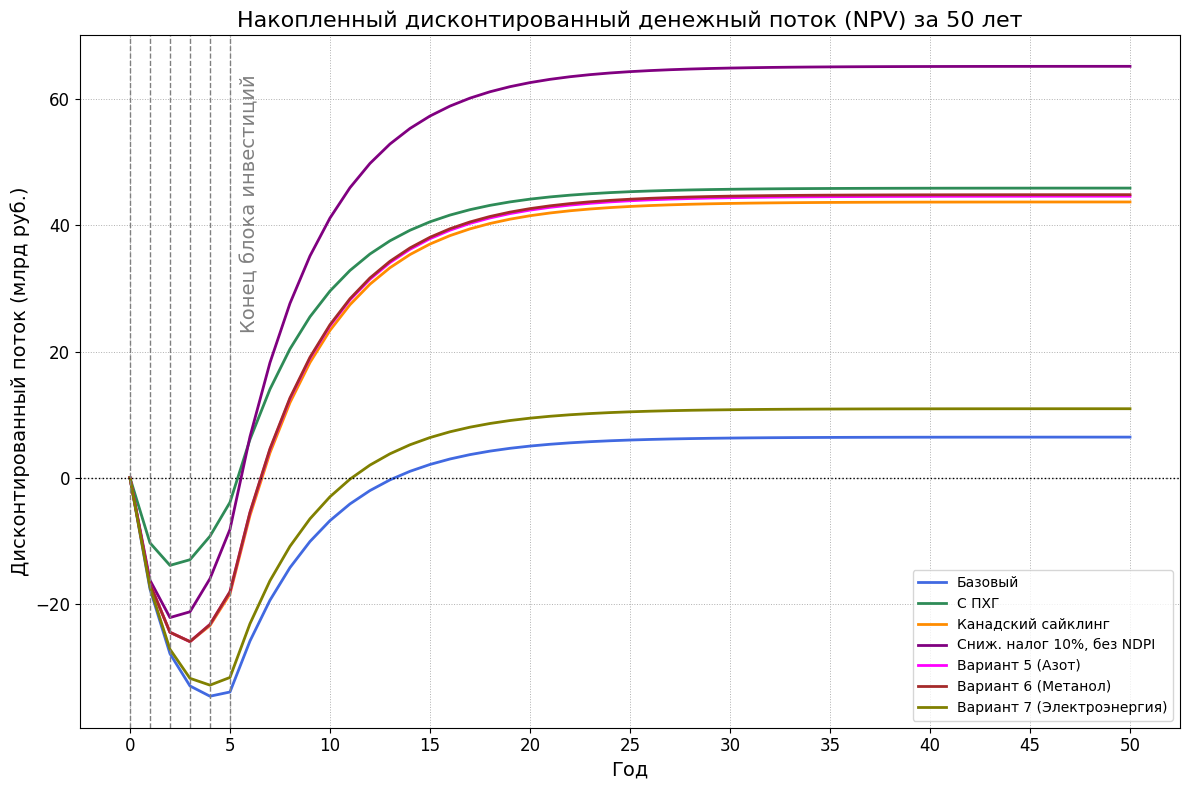

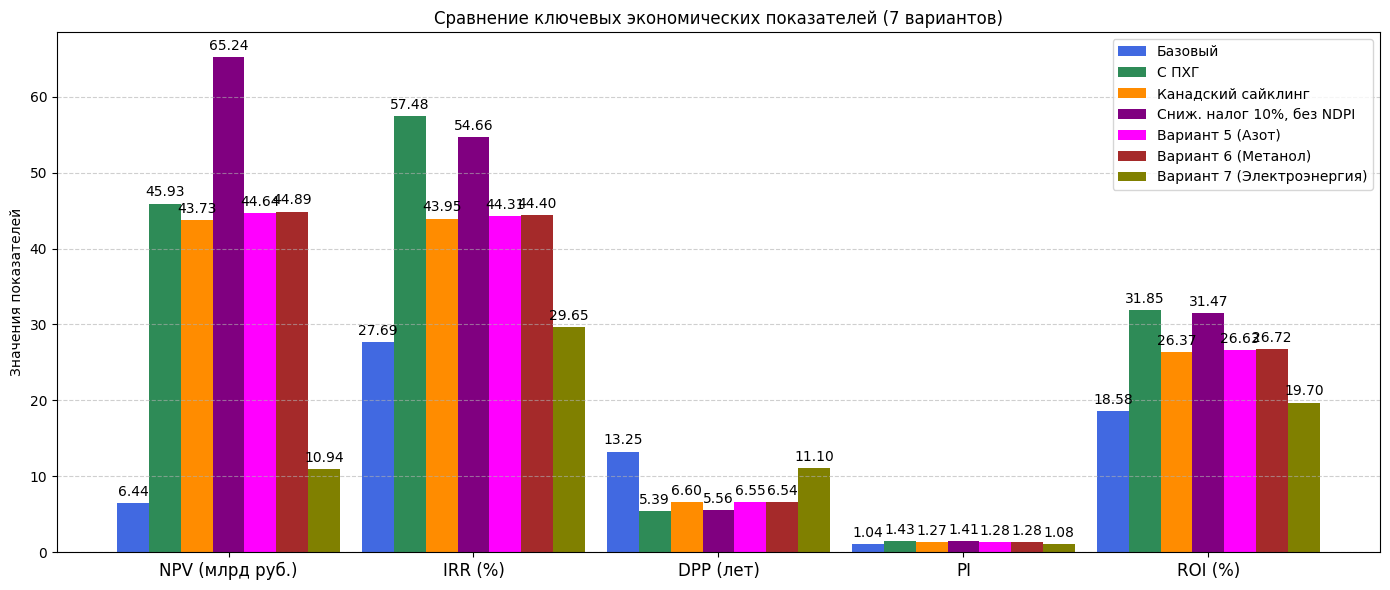

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ==============================
# 1. Распределение газа и производство СПГ
# ==============================
# Для базового варианта (значения в млн м³/мес):
gas_excess = np.array([0, 27.5, 77, 137.5, 192.5, 225.5, 247.5, 231, 181.5, 115.5, 44, 0])
conversion_factor = 1e6 / 1392  # т СПГ на 1 млн м³ (~718.4 т)
monthly_prod_base = gas_excess * conversion_factor  # т/мес
production_base = monthly_prod_base.sum()  # т/год
print(f"Базовый вариант – Годовое производство СПГ: {production_base:,.0f} т")

# Альтернативный вариант (с ПХГ)
prod_rate_alt_tph = 127.5892002  # т/час
hours_per_month = 720
monthly_prod_alt = prod_rate_alt_tph * hours_per_month  # т/мес
production_alt = monthly_prod_alt * 12  # т/год
print(f"Альтернативный вариант (с ПХГ) – Годовое производство СПГ: {production_alt:,.0f} т")

# Третий вариант (с канадским сайклингом)
gas_excess_extended = gas_excess * 1.35  # добыча на 35% выше базовой
monthly_prod_extended = gas_excess_extended * conversion_factor  # т/мес
production_extended = monthly_prod_extended.sum()  # т/год

# ==============================
# 2. Этапное наращивание мощности (50-летний анализ)
# ==============================
def ramp_factor(year):
    return min(year / 5, 1)

# ==============================
# 3. Экономические параметры и налоговые ставки
# ==============================
price = 55000             # руб/т, базовая цена СПГ
tax_rate = 0.25           # для вариантов 1-3 – 25%
NDPI_rate = 48.72         # руб/т
disc_rate_base = 0.25     # дисконт 25%

# Параметры базового варианта:
capacity_base_tph = 240
CAPEX_base = capacity_base_tph * 600e6      # ≈144 млрд руб.
OPEX_base = CAPEX_base * 0.10               # 10% от CAPEX
dep_base = CAPEX_base / 50                  # амортизация за 50 лет
property_tax_base = CAPEX_base * 0.02         # 2%

# Вариант с ПХГ:
CAPEX_eq_alt = 130 * 600e6
CAPEX_PHG = 30e9
CAPEX_alt = CAPEX_eq_alt + CAPEX_PHG         # 108 млрд руб.
OPEX_alt = (CAPEX_eq_alt * 0.10) + 1e9
dep_alt = CAPEX_alt / 20
property_tax_alt = CAPEX_alt * 0.02

# Вариант 3 (Канадский сайклинг):
CAPEX_eq_extended = 180 * 600e6 * 1.35        # базовая мощность для варианта 3
CAPEX_extended = CAPEX_eq_extended + 10e9 + 5e9  # доп. инвестиции (сайклинг + расширение)
OPEX_extended = (CAPEX_eq_extended * 0.10) + 0.5e9
dep_extended = CAPEX_extended / 20
property_tax_extended = CAPEX_extended * 0.02

# Дополнительная выручка от конденсата (для вариантов 3,4,5,6)
condensate_price_per_tonne = 55000  # руб/т
annual_condensate_t = (gas_excess_extended * 1e6 * 1e-5).sum()
condensate_annual_rev = annual_condensate_t * condensate_price_per_tonne
print(f"Третий вариант – Годовая выручка от конденсата: {condensate_annual_rev/1e9:.2f} млрд руб.")

# Дополнительные параметры для вариантов 5 и 6:
# 633 миллиона м³ газа в год – преобразуем в "миллионы м³" (как в исходном массиве):
extra_gas_million = 633 #633   # миллионы м³/год
# Дополнительное производство в тоннах = extra_gas * conversion_factor * extra_scale.
extra_scale = 0.01   # выбран для сопоставимости с другими вариантами
extra_production = extra_gas_million * conversion_factor * extra_scale  # т СПГ/год
# Например: 633 * 718.39 * 0.005 ≈ 2,270 т/год
extra_revenue_value = extra_production * price  # руб/год
# Начало дополнительной выработки для вариантов 5 и 6:
extra_start_year_variant5 = 4

# Для варианта 6 дополнительно завод по метанолу:
methanol_start_year = 5
methanol_extra_revenue = 1.0e9  # 1 млрд руб/год

# Вариант 7 (Электроэнергия): 30% СПГ используется для генерации, доп. выручка 2000 руб/т
extra_fraction_variant7 = 0.30
extra_revenue_rate_variant7 = 7000  # руб/т

# ==============================
# 4. Расчёт годовых денежных потоков (50 лет)
# ==============================
def calc_cash_flows(total_years, full_production, price, CAPEX_total, OPEX_total, dep, property_tax_total, NDPI_rate, tax_rate):
    cash_flows = np.zeros(total_years+1)
    annual_invest = CAPEX_total / 5
    for year in range(1, total_years+1):
        ramp = ramp_factor(year)
        prod_year = full_production * ramp
        revenue = prod_year * price
        OPEX_year = OPEX_total * ramp
        NDPI_cost = prod_year * NDPI_rate
        EBIT = revenue - OPEX_year - dep - NDPI_cost
        income_tax = EBIT * tax_rate if EBIT > 0 else 0
        after_tax = EBIT - income_tax
        CF = after_tax + dep - (property_tax_total * ramp)
        capex_invest = annual_invest if year <= 5 else 0
        cash_flows[year] = CF - capex_invest
    return cash_flows

def calc_cash_flows_extended(total_years, full_production, price, CAPEX_total, OPEX_total, dep, property_tax_total, NDPI_rate, tax_rate, condensate_annual_rev):
    cash_flows = np.zeros(total_years+1)
    annual_invest = CAPEX_total / 5
    for year in range(1, total_years+1):
        ramp = ramp_factor(year)
        prod_year = full_production * ramp
        revenue = prod_year * price + condensate_annual_rev * ramp
        OPEX_year = OPEX_total * ramp
        NDPI_cost = prod_year * NDPI_rate
        EBIT = revenue - OPEX_year - dep - NDPI_cost
        income_tax = EBIT * tax_rate if EBIT > 0 else 0
        after_tax = EBIT - income_tax
        CF = after_tax + dep - (property_tax_total * ramp)
        capex_invest = annual_invest if year <= 5 else 0
        cash_flows[year] = CF - capex_invest
    return cash_flows

def calc_cash_flows_extended_no_NDPI(total_years, full_production, price, CAPEX_total, OPEX_total, dep, property_tax_total, tax_rate_variant4, condensate_annual_rev):
    cash_flows = np.zeros(total_years+1)
    annual_invest = CAPEX_total / 5
    for year in range(1, total_years+1):
        ramp = ramp_factor(year)
        prod_year = full_production * ramp
        revenue = prod_year * price + condensate_annual_rev * ramp
        OPEX_year = OPEX_total * ramp
        EBIT = revenue - OPEX_year - dep  # NDPI не учитывается
        income_tax = EBIT * tax_rate_variant4 if EBIT > 0 else 0
        after_tax = EBIT - income_tax
        CF = after_tax + dep - (property_tax_total * ramp)
        capex_invest = annual_invest if year <= 5 else 0
        cash_flows[year] = CF - capex_invest
    return cash_flows

# Вариант 5 (Азот): добавляем дополнительную выручку extra_revenue_value с года extra_start_year_variant5
def calc_cash_flows_variant5(total_years, full_production, price, CAPEX_total, OPEX_total, dep, property_tax_total,
                               NDPI_rate, tax_rate, condensate_annual_rev, extra_revenue_value, extra_start_year):
    cash_flows = np.zeros(total_years+1)
    annual_invest = CAPEX_total / 5
    for year in range(1, total_years+1):
        ramp = ramp_factor(year)
        prod_year = full_production * ramp
        base_revenue = prod_year * price + condensate_annual_rev * ramp
        add_revenue = extra_revenue_value if year >= extra_start_year else 0
        revenue = base_revenue + add_revenue
        OPEX_year = OPEX_total * ramp
        NDPI_cost = prod_year * NDPI_rate
        EBIT = revenue - OPEX_year - dep - NDPI_cost
        income_tax = EBIT * tax_rate if EBIT > 0 else 0
        after_tax = EBIT - income_tax
        CF = after_tax + dep - (property_tax_total * ramp)
        capex_invest = annual_invest if year <= 5 else 0
        cash_flows[year] = CF - capex_invest
    return cash_flows

# Вариант 6 (Метанол): вариант 5 + фиксированная выручка от метанольного завода с methanol_start_year
def calc_cash_flows_variant6(total_years, full_production, price, CAPEX_total, OPEX_total, dep, property_tax_total,
                               NDPI_rate, tax_rate, condensate_annual_rev, extra_revenue_value, extra_start_year,
                               methanol_extra_revenue, methanol_start_year):
    cash_flows = np.zeros(total_years+1)
    annual_invest = CAPEX_total / 5
    for year in range(1, total_years+1):
        ramp = ramp_factor(year)
        prod_year = full_production * ramp
        base_revenue = prod_year * price + condensate_annual_rev * ramp
        add_revenue = extra_revenue_value if year >= extra_start_year else 0
        methanol_rev = methanol_extra_revenue if year >= methanol_start_year else 0
        revenue = base_revenue + add_revenue + methanol_rev
        OPEX_year = OPEX_total * ramp
        NDPI_cost = prod_year * NDPI_rate
        EBIT = revenue - OPEX_year - dep - NDPI_cost
        income_tax = EBIT * tax_rate if EBIT > 0 else 0
        after_tax = EBIT - income_tax
        CF = after_tax + dep - (property_tax_total * ramp)
        capex_invest = annual_invest if year <= 5 else 0
        cash_flows[year] = CF - capex_invest
    return cash_flows

# Вариант 7 (Электроэнергия): базовый вариант + дополнительная выручка
def calc_cash_flows_variant7(total_years, full_production, price, CAPEX_total, OPEX_total, dep, property_tax_total,
                               NDPI_rate, tax_rate, extra_fraction, extra_revenue_rate):
    cash_flows = np.zeros(total_years+1)
    annual_invest = CAPEX_total / 5
    for year in range(1, total_years+1):
        ramp = ramp_factor(year)
        prod_year = full_production * ramp
        extra_revenue = prod_year * extra_fraction * extra_revenue_rate
        revenue = prod_year * price + extra_revenue
        OPEX_year = OPEX_total * ramp
        NDPI_cost = prod_year * NDPI_rate
        EBIT = revenue - OPEX_year - dep - NDPI_cost
        income_tax = EBIT * tax_rate if EBIT > 0 else 0
        after_tax = EBIT - income_tax
        CF = after_tax + dep - (property_tax_total * ramp)
        capex_invest = annual_invest if year <= 5 else 0
        cash_flows[year] = CF - capex_invest
    return cash_flows

total_years = 50

# Расчёт денежных потоков для вариантов:
cash_flows_base = calc_cash_flows(total_years, production_base, price, CAPEX_base, OPEX_base, dep_base, property_tax_base, NDPI_rate, tax_rate)
cash_flows_alt = calc_cash_flows(total_years, production_alt, price, CAPEX_alt, OPEX_alt, dep_alt, property_tax_alt, NDPI_rate, tax_rate)
cash_flows_extended = calc_cash_flows_extended(total_years, production_extended, price, CAPEX_extended, OPEX_extended, dep_extended, property_tax_extended, NDPI_rate, tax_rate, condensate_annual_rev)
# Вариант 4: без NDPI и налог 10%
tax_rate_variant4 = 0.10
cash_flows_variant4 = calc_cash_flows_extended_no_NDPI(total_years, production_extended, price, CAPEX_extended, OPEX_extended, dep_extended, property_tax_extended, tax_rate_variant4, condensate_annual_rev)
# Вариант 5 (Азот): дополнительная выручка extra_revenue_value с 4-го года
cash_flows_variant5 = calc_cash_flows_variant5(total_years, production_extended, price, CAPEX_extended, OPEX_extended, dep_extended, property_tax_extended,
                                               NDPI_rate, tax_rate, condensate_annual_rev, extra_revenue_value, extra_start_year_variant5)
# Вариант 6 (Метанол): вариант 5 + фиксированная выручка от завода по метанолу с 5-го года
cash_flows_variant6 = calc_cash_flows_variant6(total_years, production_extended, price, CAPEX_extended, OPEX_extended, dep_extended, property_tax_extended,
                                               NDPI_rate, tax_rate, condensate_annual_rev,
                                               extra_revenue_value, extra_start_year_variant5, methanol_extra_revenue, methanol_start_year)
# Вариант 7 (Электроэнергия): базовый вариант с доп. выручкой от генерации (30% СПГ по 2000 руб/т)
cash_flows_variant7 = calc_cash_flows_variant7(total_years, production_base, price, CAPEX_base, OPEX_base, dep_base, property_tax_base,
                                               NDPI_rate, tax_rate, extra_fraction_variant7, extra_revenue_rate_variant7)

# ==============================
# 5. Расчёт экономических показателей
# ==============================
def npv_calc(cash_flows, rate):
    return sum(cash_flows[t] / ((1+rate)**t) for t in range(len(cash_flows)))

def calc_irr(cash_flows, low=-0.5, high=1.0, tol=1e-6):
    def npv_at(r):
        return sum(cash_flows[t] / ((1+r)**t) for t in range(len(cash_flows)))
    while high - low > tol:
        mid = (low + high) / 2
        if npv_at(mid)*npv_at(low) < 0:
            high = mid
        else:
            low = mid
    return (low + high) / 2

def calc_dpp(cash_flows, rate):
    disc_cfs = np.array([cash_flows[t] / ((1+rate)**t) for t in range(len(cash_flows))])
    cum = np.cumsum(disc_cfs)
    if cum[-1] < 0:
        return None
    for i in range(1, len(cum)):
        if cum[i] >= 0:
            return i - 1 + (0 - cum[i-1]) / (cum[i] - cum[i-1])
    return None

def calc_econ_indicators(cash_flows, rate, CAPEX_total, horizon):
    npv_val = npv_calc(cash_flows, rate)
    irr_val = calc_irr(cash_flows)
    dpp_val = calc_dpp(cash_flows, rate)
    pi_val = (npv_val + CAPEX_total) / CAPEX_total
    roi_val = (sum(cash_flows[1:]) / CAPEX_total) * 100 / horizon
    return npv_val, irr_val, dpp_val, pi_val, roi_val

econ_base = calc_econ_indicators(cash_flows_base, disc_rate_base, CAPEX_base, total_years)
econ_alt = calc_econ_indicators(cash_flows_alt, disc_rate_base, CAPEX_alt, total_years)
econ_extended = calc_econ_indicators(cash_flows_extended, disc_rate_base, CAPEX_extended, total_years)
econ_variant4 = calc_econ_indicators(cash_flows_variant4, disc_rate_base, CAPEX_extended, total_years)
econ_variant5 = calc_econ_indicators(cash_flows_variant5, disc_rate_base, CAPEX_extended, total_years)
econ_variant6 = calc_econ_indicators(cash_flows_variant6, disc_rate_base, CAPEX_extended, total_years)
econ_variant7 = calc_econ_indicators(cash_flows_variant7, disc_rate_base, CAPEX_base, total_years)

print("\nЭкономические показатели проекта за 50 лет (Базовый вариант):")
print(f"NPV: {npv_calc(cash_flows_base, disc_rate_base)/1e9:.2f} млрд руб. | IRR: {calc_irr(cash_flows_base)*100:.2f}% | DPP: {calc_dpp(cash_flows_base, disc_rate_base):.2f} лет")
print(f"PI: {econ_base[3]:.2f} | ROI: {econ_base[4]:.2f}%")

print("\nЭкономические показатели проекта за 50 лет (Вариант с ПХГ):")
print(f"NPV: {npv_calc(cash_flows_alt, disc_rate_base)/1e9:.2f} млрд руб. | IRR: {calc_irr(cash_flows_alt)*100:.2f}% | DPP: {calc_dpp(cash_flows_alt, disc_rate_base):.2f} лет")
print(f"PI: {econ_alt[3]:.2f} | ROI: {econ_alt[4]:.2f}%")

print("\nЭкономические показатели проекта за 50 лет (Вариант 3 – Канадский сайклинг):")
print(f"NPV: {npv_calc(cash_flows_extended, disc_rate_base)/1e9:.2f} млрд руб. | IRR: {calc_irr(cash_flows_extended)*100:.2f}% | DPP: {calc_dpp(cash_flows_extended, disc_rate_base):.2f} лет")
print(f"PI: {econ_extended[3]:.2f} | ROI: {econ_extended[4]:.2f}%")

print("\nЭкономические показатели проекта за 50 лет (Вариант 4 – Канадский сайклинг, без NDPI, налог 10%):")
print(f"NPV: {npv_calc(cash_flows_variant4, disc_rate_base)/1e9:.2f} млрд руб. | IRR: {calc_irr(cash_flows_variant4)*100:.2f}% | DPP: {calc_dpp(cash_flows_variant4, disc_rate_base):.2f} лет")
print(f"PI: {econ_variant4[3]:.2f} | ROI: {econ_variant4[4]:.2f}%")

print("\nЭкономические показатели проекта за 50 лет (Вариант 5 – Азот):")
print(f"NPV: {npv_calc(cash_flows_variant5, disc_rate_base)/1e9:.2f} млрд руб. | IRR: {calc_irr(cash_flows_variant5)*100:.2f}% | DPP: {calc_dpp(cash_flows_variant5, disc_rate_base):.2f} лет")
print(f"PI: {econ_variant5[3]:.2f} | ROI: {econ_variant5[4]:.2f}%")

print("\nЭкономические показатели проекта за 50 лет (Вариант 6 – Метанол):")
print(f"NPV: {npv_calc(cash_flows_variant6, disc_rate_base)/1e9:.2f} млрд руб. | IRR: {calc_irr(cash_flows_variant6)*100:.2f}% | DPP: {calc_dpp(cash_flows_variant6, disc_rate_base):.2f} лет")
print(f"PI: {econ_variant6[3]:.2f} | ROI: {econ_variant6[4]:.2f}%")

print("\nЭкономические показатели проекта за 50 лет (Вариант 7 – Электроэнергия в посёлках Якутии):")
print(f"NPV: {npv_calc(cash_flows_variant7, disc_rate_base)/1e9:.2f} млрд руб. | IRR: {calc_irr(cash_flows_variant7)*100:.2f}% | DPP: {calc_dpp(cash_flows_variant7, disc_rate_base):.2f} лет")
print(f"PI: {econ_variant7[3]:.2f} | ROI: {econ_variant7[4]:.2f}%")

# ==============================
# 6. Графики
# ==============================
def cumulative_discounted(cash_flows, rate):
    return np.cumsum([cash_flows[t] / ((1+rate)**t) for t in range(len(cash_flows))])

years_array = np.arange(0, total_years+1)
cum_disc_base = cumulative_discounted(cash_flows_base, disc_rate_base)
cum_disc_alt = cumulative_discounted(cash_flows_alt, disc_rate_base)
cum_disc_extended = cumulative_discounted(cash_flows_extended, disc_rate_base)
cum_disc_variant4 = cumulative_discounted(cash_flows_variant4, disc_rate_base)
cum_disc_variant5 = cumulative_discounted(cash_flows_variant5, disc_rate_base)
cum_disc_variant6 = cumulative_discounted(cash_flows_variant6, disc_rate_base)
cum_disc_variant7 = cumulative_discounted(cash_flows_variant7, disc_rate_base)

plt.figure(figsize=(12,8))
plt.plot(years_array, cum_disc_base/1e9, linestyle='-', linewidth=2, color='royalblue', label="Базовый")
plt.plot(years_array, cum_disc_alt/1e9, linestyle='-', linewidth=2, color='seagreen', label="С ПХГ")
plt.plot(years_array, cum_disc_extended/1e9, linestyle='-', linewidth=2, color='darkorange', label="Канадский сайклинг")
plt.plot(years_array, cum_disc_variant4/1e9, linestyle='-', linewidth=2, color='purple', label="Сниж. налог 10%, без NDPI")
plt.plot(years_array, cum_disc_variant5/1e9, linestyle='-', linewidth=2, color='magenta', label="Вариант 5 (Азот)")
plt.plot(years_array, cum_disc_variant6/1e9, linestyle='-', linewidth=2, color='brown', label="Вариант 6 (Метанол)")
plt.plot(years_array, cum_disc_variant7/1e9, linestyle='-', linewidth=2, color='olive', label="Вариант 7 (Электроэнергия)")

for yr in range(0, 6):
    plt.axvline(x=yr, linestyle='--', color='gray', linewidth=1)
plt.text(5.5, max(np.max(cum_disc_base/1e9), np.max(cum_disc_alt/1e9), np.max(cum_disc_extended/1e9),
                   np.max(cum_disc_variant4/1e9), np.max(cum_disc_variant5/1e9), np.max(cum_disc_variant6/1e9),
                   np.max(cum_disc_variant7/1e9))*0.98, "Конец блока инвестиций", fontsize=14, color='gray', rotation=90, va='top')
plt.axhline(0, color='black', linestyle=':', linewidth=1)
plt.title("Накопленный дисконтированный денежный поток (NPV) за 50 лет", fontsize=16)
plt.xlabel("Год", fontsize=14)
plt.ylabel("Дисконтированный поток (млрд руб.)", fontsize=14)
plt.grid(True, linestyle=":", linewidth=0.7)
plt.xticks(np.arange(0, total_years+1, 5), fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.tight_layout()
plt.show()

# Сравнение ключевых экономических показателей (бар-чарт)
metrics = ['NPV (млрд руб.)', 'IRR (%)', 'DPP (лет)', 'PI', 'ROI (%)']
values_base = [npv_calc(cash_flows_base, disc_rate_base)/1e9, calc_irr(cash_flows_base)*100, calc_dpp(cash_flows_base, disc_rate_base), econ_base[3], econ_base[4]]
values_alt = [npv_calc(cash_flows_alt, disc_rate_base)/1e9, calc_irr(cash_flows_alt)*100, calc_dpp(cash_flows_alt, disc_rate_base), econ_alt[3], econ_alt[4]]
values_third = [npv_calc(cash_flows_extended, disc_rate_base)/1e9, calc_irr(cash_flows_extended)*100, calc_dpp(cash_flows_extended, disc_rate_base), econ_extended[3], econ_extended[4]]
values_variant4 = [npv_calc(cash_flows_variant4, disc_rate_base)/1e9, calc_irr(cash_flows_variant4)*100, calc_dpp(cash_flows_variant4, disc_rate_base), econ_variant4[3], econ_variant4[4]]
values_variant5 = [npv_calc(cash_flows_variant5, disc_rate_base)/1e9, calc_irr(cash_flows_variant5)*100, calc_dpp(cash_flows_variant5, disc_rate_base), econ_variant5[3], econ_variant5[4]]
values_variant6 = [npv_calc(cash_flows_variant6, disc_rate_base)/1e9, calc_irr(cash_flows_variant6)*100, calc_dpp(cash_flows_variant6, disc_rate_base), econ_variant6[3], econ_variant6[4]]
values_variant7 = [npv_calc(cash_flows_variant7, disc_rate_base)/1e9, calc_irr(cash_flows_variant7)*100, calc_dpp(cash_flows_variant7, disc_rate_base), econ_variant7[3], econ_variant7[4]]

N = len(metrics)
ind = np.arange(N)
width = 0.13

fig, ax = plt.subplots(figsize=(14, 6))
bars1 = ax.bar(ind - 3*width, values_base, width, label='Базовый', color='royalblue')
bars2 = ax.bar(ind - 2*width, values_alt, width, label='С ПХГ', color='seagreen')
bars3 = ax.bar(ind - width, values_third, width, label='Канадский сайклинг', color='darkorange')
bars4 = ax.bar(ind, values_variant4, width, label='Сниж. налог 10%, без NDPI', color='purple')
bars5 = ax.bar(ind + width, values_variant5, width, label='Вариант 5 (Азот)', color='magenta')
bars6 = ax.bar(ind + 2*width, values_variant6, width, label='Вариант 6 (Метанол)', color='brown')
bars7 = ax.bar(ind + 3*width, values_variant7, width, label='Вариант 7 (Электроэнергия)', color='olive')

ax.set_ylabel('Значения показателей')
ax.set_title('Сравнение ключевых экономических показателей (7 вариантов)')
ax.set_xticks(ind)
ax.set_xticklabels(metrics, fontsize=12)
ax.legend(fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.6)

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

autolabel(bars1)
autolabel(bars2)
autolabel(bars3)
autolabel(bars4)
autolabel(bars5)
autolabel(bars6)
autolabel(bars7)

plt.tight_layout()
plt.show()


Базовый вариант – Годовое производство СПГ: 1,062,859 т
Альтернативный вариант (с ПХГ) – Годовое производство СПГ: 1,102,371 т
Третий вариант – Годовая выручка от конденсата: 1.10 млрд руб.

Экономические показатели проекта за 50 лет (Базовый вариант):
NPV: 6.44 млрд руб. | IRR: 27.69% | DPP: 13.25 лет
PI: 1.04 | ROI: 18.58%

Экономические показатели проекта за 50 лет (Вариант с ПХГ):
NPV: 45.93 млрд руб. | IRR: 57.48% | DPP: 5.39 лет
PI: 1.43 | ROI: 31.85%

Экономические показатели проекта за 50 лет (Вариант 3 – Канадский сайклинг):
NPV: 43.73 млрд руб. | IRR: 43.95% | DPP: 6.60 лет
PI: 1.27 | ROI: 26.37%

Экономические показатели проекта за 50 лет (Вариант 4 – Канадский сайклинг, без NDPI, налог 15%):
NPV: 58.12 млрд руб. | IRR: 51.01% | DPP: 5.83 лет
PI: 1.36 | ROI: 29.78%

Экономические показатели проекта за 50 лет (Вариант 5 – Азот):
NPV: 47.50 млрд руб. | IRR: 45.43% | DPP: 6.41 лет
PI: 1.30 | ROI: 27.47%

Экономические показатели проекта за 50 лет (Вариант 6 – Метанол):
NPV: 48.

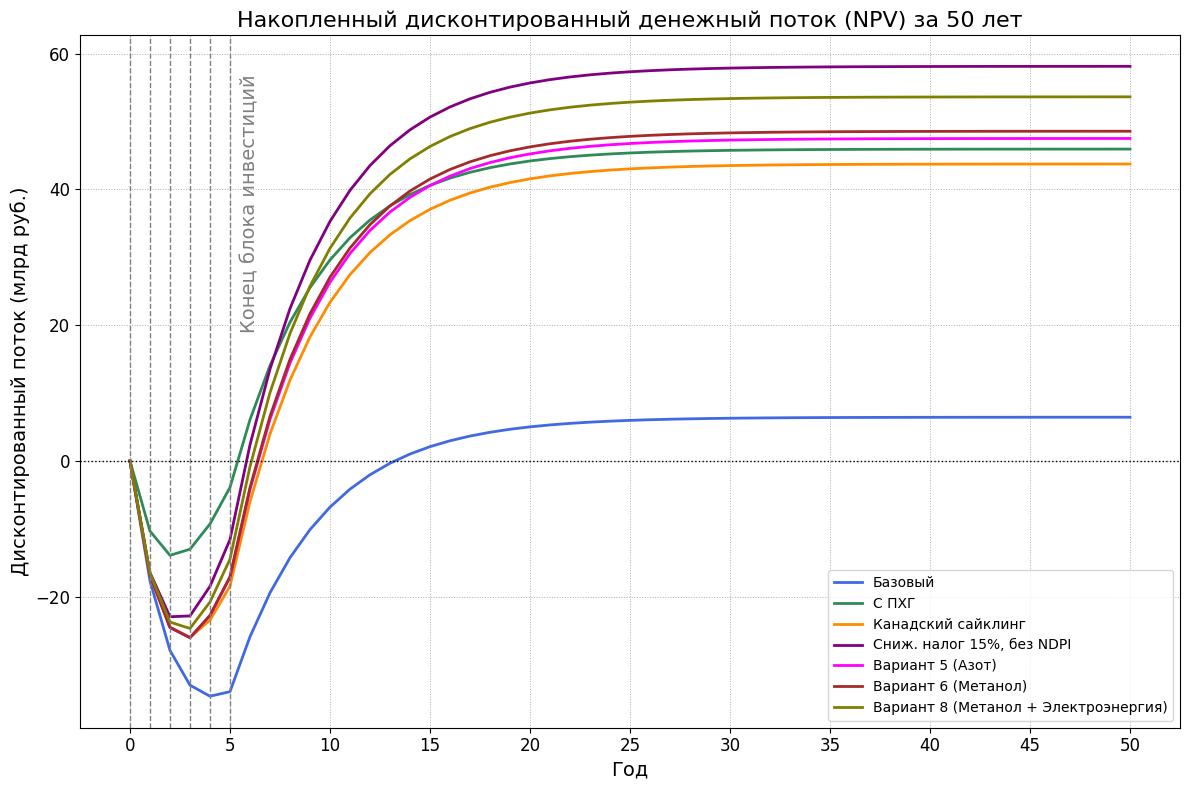

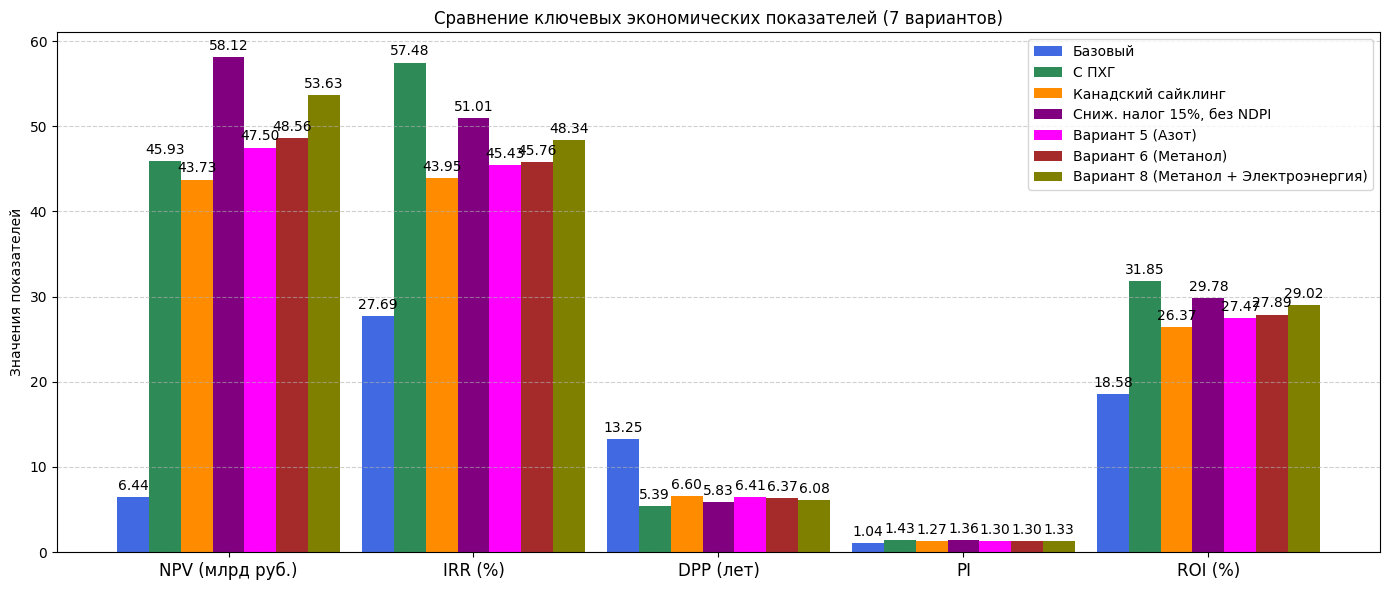

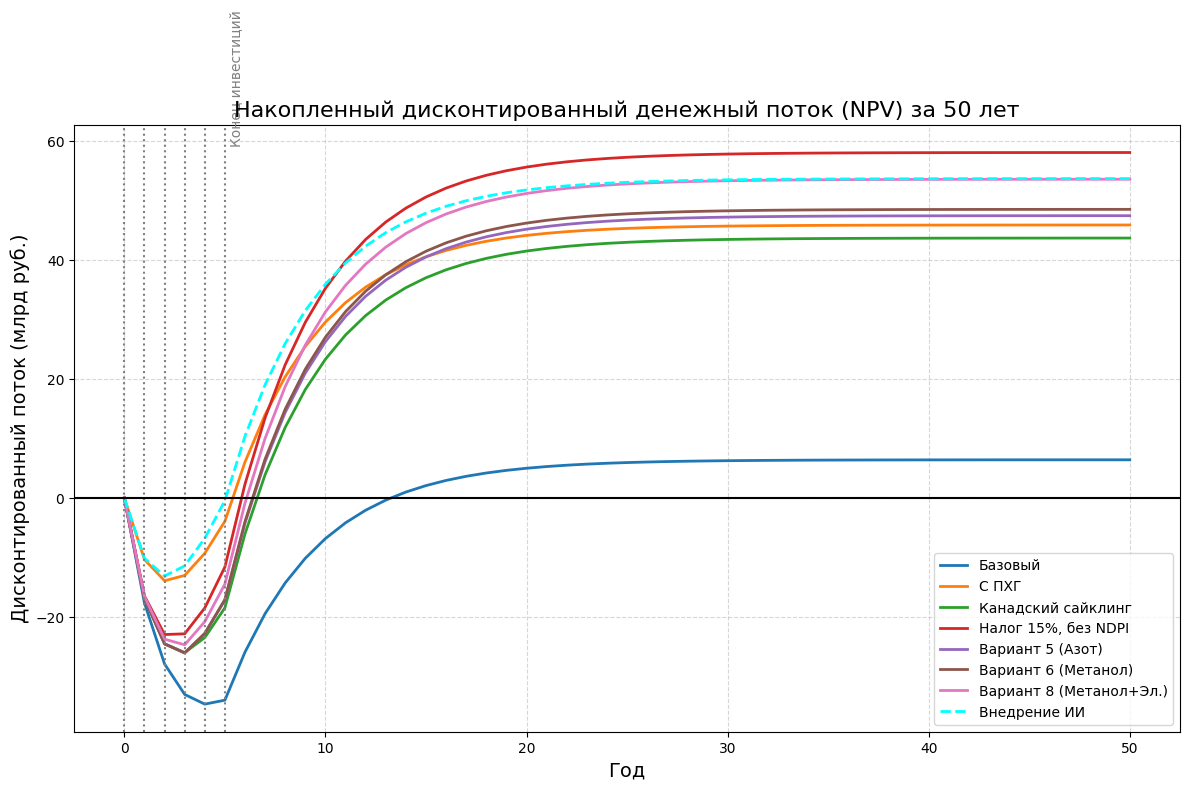

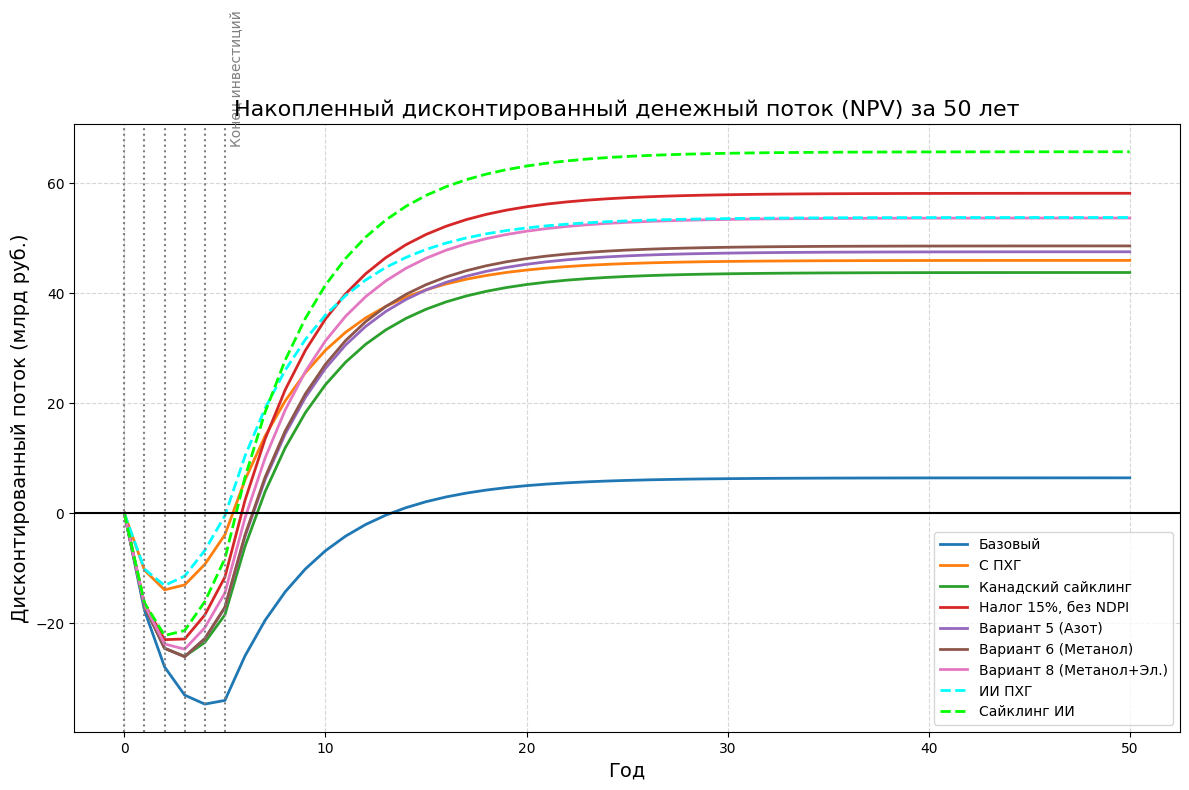

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ==============================
# 1. Распределение газа и производство СПГ
# ==============================
# Для базового варианта (единицы – млн м³/мес):
gas_excess = np.array([0, 27.5, 77, 137.5, 192.5, 225.5, 247.5, 231, 181.5, 115.5, 44, 0])
conversion_factor = 1e6 / 1392  # т СПГ на 1 млн м³ (~718.4 т)
monthly_prod_base = gas_excess * conversion_factor
production_base = monthly_prod_base.sum()  # т/год
print(f"Базовый вариант – Годовое производство СПГ: {production_base:,.0f} т")

# Альтернативный вариант (с ПХГ):
prod_rate_alt_tph = 127.5892002  # т/час
hours_per_month = 720
monthly_prod_alt = prod_rate_alt_tph * hours_per_month
production_alt = monthly_prod_alt * 12
print(f"Альтернативный вариант (с ПХГ) – Годовое производство СПГ: {production_alt:,.0f} т")

# Третий вариант (с канадским сайклингом):
gas_excess_extended = gas_excess * 1.35  # добыча на 35% выше базовой
monthly_prod_extended = gas_excess_extended * conversion_factor
production_extended = monthly_prod_extended.sum()  # т/год

# ==============================
# 2. Этапное наращивание мощности (50 лет)
# ==============================
def ramp_factor(year):
    return min(year/5, 1)

# ==============================
# 3. Экономические параметры и налоговые ставки
# ==============================
price = 55000             # руб/т, цена СПГ
tax_rate = 0.25           # для вариантов 1–3 – 25%
NDPI_rate = 48.72         # руб/т
disc_rate_base = 0.25     # дисконт 25%

# Параметры базового варианта:
capacity_base_tph = 240
CAPEX_base = capacity_base_tph * 600e6        # ≈144 млрд руб.
OPEX_base = CAPEX_base * 0.10                 # 10%
dep_base = CAPEX_base / 50                    # 50-летний горизонт
property_tax_base = CAPEX_base * 0.02

# Вариант с ПХГ:
CAPEX_eq_alt = 130 * 600e6
CAPEX_PHG = 30e9
CAPEX_alt = CAPEX_eq_alt + CAPEX_PHG           # 108 млрд руб.
OPEX_alt = (CAPEX_eq_alt * 0.10) + 1e9
dep_alt = CAPEX_alt / 20
property_tax_alt = CAPEX_alt * 0.02

# Вариант 3 (Канадский сайклинг):
CAPEX_eq_extended = 180 * 600e6 * 1.35         # базовая мощность для варианта 3
CAPEX_extended = CAPEX_eq_extended + 10e9 + 5e9  # доп. инвестиции (сайклинг + расширение)
OPEX_extended = (CAPEX_eq_extended * 0.10) + 0.5e9
dep_extended = CAPEX_extended / 20
property_tax_extended = CAPEX_extended * 0.02

# Дополнительная выручка от конденсата (для вариантов 3,4,5,6):
condensate_price_per_tonne = 55000
annual_condensate_t = (gas_excess_extended * 1e6 * 1e-5).sum()
condensate_annual_rev = annual_condensate_t * condensate_price_per_tonne
print(f"Третий вариант – Годовая выручка от конденсата: {condensate_annual_rev/1e9:.2f} млрд руб.")

# Дополнительные параметры для вариантов 5 и 6:
# Дополнительное производство: по условию 633 млн м³ в год,
# используем extra_scale для монетизации дополнительного газа.
extra_gas_million = 633   # млн м³/год
extra_scale = 0.1         # процент от доступного объёма (10%)
extra_production = extra_gas_million * conversion_factor * extra_scale  # т СПГ/год
extra_revenue_value = extra_production * price  # руб/год
# Дополнительный эффект начинается с 4-го года:
extra_start_year_variant5 = 4

# Капитальные затраты на азотный завод: 17 блочных установок суммарно 170 млн руб,
# распределено равномерно по 3-му и 4-му году.
extra_nitrogen_CAPEX_per_year = 85e6  # руб

# Для варианта 6 дополнительно завод по метанолу:
methanol_start_year = 5
methanol_CAPEX = 500e6   # 500 млн руб – капзатраты на метанольный завод
methanol_extra_revenue = 1.0e9  # 1 млрд руб/год фиксированная выручка

# Вариант 7 (Электроэнергия) в предыдущей версии рассчитывался с extra_fraction=0.50
# Теперь создаём вариант 8 (метанол + электроэнергия): по логике варианта 6, но дополнительно
# прибавляем доход от электроэнергии: при этом только 50% СПГ используется для генерации.
electricity_fraction = 0.25
electricity_rate = 7000   # руб/т

# ==============================
# 4. Расчёт годовых денежных потоков (50 лет)
# ==============================
def calc_cash_flows(total_years, full_production, price, CAPEX_total, OPEX_total, dep, property_tax_total, NDPI_rate, tax_rate):
    cash_flows = np.zeros(total_years+1)
    annual_invest = CAPEX_total/5
    for year in range(1, total_years+1):
        ramp = ramp_factor(year)
        prod_year = full_production * ramp
        revenue = prod_year * price
        OPEX_year = OPEX_total * ramp
        NDPI_cost = prod_year * NDPI_rate
        EBIT = revenue - OPEX_year - dep - NDPI_cost
        income_tax = EBIT * tax_rate if EBIT > 0 else 0
        after_tax = EBIT - income_tax
        CF = after_tax + dep - (property_tax_total * ramp)
        capex_invest = annual_invest if year<=5 else 0
        cash_flows[year] = CF - capex_invest
    return cash_flows

def calc_cash_flows_extended(total_years, full_production, price, CAPEX_total, OPEX_total, dep, property_tax_total,
                             NDPI_rate, tax_rate, condensate_annual_rev):
    cash_flows = np.zeros(total_years+1)
    annual_invest = CAPEX_total/5
    for year in range(1, total_years+1):
        ramp = ramp_factor(year)
        prod_year = full_production * ramp
        revenue = prod_year * price + condensate_annual_rev * ramp
        OPEX_year = OPEX_total * ramp
        NDPI_cost = prod_year * NDPI_rate
        EBIT = revenue - OPEX_year - dep - NDPI_cost
        income_tax = EBIT * tax_rate if EBIT > 0 else 0
        after_tax = EBIT - income_tax
        CF = after_tax + dep - (property_tax_total * ramp)
        capex_invest = annual_invest if year<=5 else 0
        cash_flows[year] = CF - capex_invest
    return cash_flows

def calc_cash_flows_extended_no_NDPI(total_years, full_production, price, CAPEX_total, OPEX_total, dep, property_tax_total, tax_rate_variant4, condensate_annual_rev):
    cash_flows = np.zeros(total_years+1)
    annual_invest = CAPEX_total/5
    for year in range(1, total_years+1):
        ramp = ramp_factor(year)
        prod_year = full_production * ramp
        revenue = prod_year * price + condensate_annual_rev * ramp
        OPEX_year = OPEX_total * ramp
        EBIT = revenue - OPEX_year - dep   # NDPI не учитывается
        income_tax = EBIT * tax_rate_variant4 if EBIT > 0 else 0
        after_tax = EBIT - income_tax
        CF = after_tax + dep - (property_tax_total * ramp)
        capex_invest = annual_invest if year<=5 else 0
        cash_flows[year] = CF - capex_invest
    return cash_flows

# Вариант 5 (Азот): вариант 3 + дополнительная выручка от extra_revenue_value
# плюс дополнительные капзатраты по азотным установкам в годах 3 и 4.
def calc_cash_flows_variant5(total_years, full_production, price, CAPEX_total, OPEX_total, dep, property_tax_total,
                             NDPI_rate, tax_rate, condensate_annual_rev, extra_revenue_value, extra_start_year):
    cash_flows = np.zeros(total_years+1)
    annual_invest = CAPEX_total/5
    for year in range(1, total_years+1):
        extra_capex = 0
        if year in [3, 4]:
            extra_capex = extra_nitrogen_CAPEX_per_year
        ramp = ramp_factor(year)
        prod_year = full_production * ramp
        base_revenue = prod_year * price + condensate_annual_rev * ramp
        add_revenue = extra_revenue_value if year>=extra_start_year else 0
        revenue = base_revenue + add_revenue
        OPEX_year = OPEX_total * ramp
        NDPI_cost = prod_year * NDPI_rate
        EBIT = revenue - OPEX_year - dep - NDPI_cost
        income_tax = EBIT * tax_rate if EBIT>0 else 0
        after_tax = EBIT - income_tax
        CF = after_tax + dep - (property_tax_total * ramp)
        capex_invest = annual_invest if year<=5 else 0
        cash_flows[year] = CF - capex_invest - extra_capex
    return cash_flows

# Вариант 6 (Метанол): вариант 5 + фиксированная выручка от метанольного завода с 5-го года,
# плюс в год 5 дополнительно капзатраты на метанольный завод.
def calc_cash_flows_variant6(total_years, full_production, price, CAPEX_total, OPEX_total, dep, property_tax_total,
                             NDPI_rate, tax_rate, condensate_annual_rev, extra_revenue_value, extra_start_year,
                             methanol_extra_revenue, methanol_start_year):
    cash_flows = np.zeros(total_years+1)
    annual_invest = CAPEX_total/5
    for year in range(1, total_years+1):
        extra_capex = 0
        if year in [3,4]:
            extra_capex = extra_nitrogen_CAPEX_per_year
        if year == methanol_start_year:
            extra_capex += methanol_CAPEX
        ramp = ramp_factor(year)
        prod_year = full_production * ramp
        base_revenue = prod_year * price + condensate_annual_rev * ramp
        add_revenue = extra_revenue_value if year>=extra_start_year else 0
        methanol_rev = methanol_extra_revenue if year>=methanol_start_year else 0
        revenue = base_revenue + add_revenue + methanol_rev
        OPEX_year = OPEX_total * ramp
        NDPI_cost = prod_year * NDPI_rate
        EBIT = revenue - OPEX_year - dep - NDPI_cost
        income_tax = EBIT * tax_rate if EBIT>0 else 0
        after_tax = EBIT - income_tax
        CF = after_tax + dep - (property_tax_total * ramp)
        capex_invest = annual_invest if year<=5 else 0
        cash_flows[year] = CF - capex_invest - extra_capex
    return cash_flows

# Вариант 8 (Метанол + Электроэнергия):
# Берём логику варианта 6 и дополнительно прибавляем доход от электроэнергии.
# Дополнительное электроэнергетическое вознаграждение: 
# extra_electricity_rev = prod_year * electricity_fraction * electricity_rate.
def calc_cash_flows_variant8(total_years, full_production, price, CAPEX_total, OPEX_total, dep, property_tax_total,
                             NDPI_rate, tax_rate, condensate_annual_rev, extra_revenue_value, extra_start_year,
                             methanol_extra_revenue, methanol_start_year, electricity_fraction, electricity_rate):
    cash_flows = np.zeros(total_years+1)
    annual_invest = CAPEX_total/5
    for year in range(1, total_years+1):
        extra_capex = 0
        if year in [3,4]:
            extra_capex = extra_nitrogen_CAPEX_per_year
        if year == methanol_start_year:
            extra_capex += methanol_CAPEX
        ramp = ramp_factor(year)
        prod_year = full_production * ramp
        base_revenue = prod_year * price + condensate_annual_rev * ramp
        add_revenue = extra_revenue_value if year>=extra_start_year else 0
        methanol_rev = methanol_extra_revenue if year>=methanol_start_year else 0
        # Дополнительный доход от электроэнергии – на 50% от СПГ
        elec_rev = prod_year * electricity_fraction * electricity_rate
        revenue = base_revenue + add_revenue + methanol_rev + elec_rev
        OPEX_year = OPEX_total * ramp
        NDPI_cost = prod_year * NDPI_rate
        EBIT = revenue - OPEX_year - dep - NDPI_cost
        income_tax = EBIT * tax_rate if EBIT>0 else 0
        after_tax = EBIT - income_tax
        CF = after_tax + dep - (property_tax_total * ramp)
        capex_invest = annual_invest if year<=5 else 0
        cash_flows[year] = CF - capex_invest - extra_capex
    return cash_flows

total_years = 50

# Расчёт денежных потоков для всех вариантов:
cash_flows_base      = calc_cash_flows(total_years, production_base, price, CAPEX_base, OPEX_base, dep_base, property_tax_base, NDPI_rate, tax_rate)
cash_flows_alt       = calc_cash_flows(total_years, production_alt, price, CAPEX_alt, OPEX_alt, dep_alt, property_tax_alt, NDPI_rate, tax_rate)
cash_flows_extended  = calc_cash_flows_extended(total_years, production_extended, price, CAPEX_extended, OPEX_extended, dep_extended, property_tax_extended, NDPI_rate, tax_rate, condensate_annual_rev)
tax_rate_variant4 = 0.15  # для варианта 4 можно задать другой процент (здесь 15% как пример)
cash_flows_variant4  = calc_cash_flows_extended_no_NDPI(total_years, production_extended, price, CAPEX_extended, OPEX_extended, dep_extended, property_tax_extended, tax_rate_variant4, condensate_annual_rev)
cash_flows_variant5  = calc_cash_flows_variant5(total_years, production_extended, price, CAPEX_extended, OPEX_extended, dep_extended, property_tax_extended,
                                                  NDPI_rate, tax_rate, condensate_annual_rev, extra_revenue_value, extra_start_year_variant5)
cash_flows_variant6  = calc_cash_flows_variant6(total_years, production_extended, price, CAPEX_extended, OPEX_extended, dep_extended, property_tax_extended,
                                                  NDPI_rate, tax_rate, condensate_annual_rev, extra_revenue_value, extra_start_year_variant5, methanol_extra_revenue, methanol_start_year)
# Новый вариант 8: основан на варианте 6, плюс дополнительная выручка от электроэнергии, учитывая 50% СПГ
cash_flows_variant8  = calc_cash_flows_variant8(total_years, production_extended, price, CAPEX_extended, OPEX_extended, dep_extended, property_tax_extended,
                                                  NDPI_rate, tax_rate, condensate_annual_rev, extra_revenue_value, extra_start_year_variant5,
                                                  methanol_extra_revenue, methanol_start_year, electricity_fraction, electricity_rate)

# ==============================
# 5. Расчёт экономических показателей
# ==============================
def npv_calc(cash_flows, rate):
    return sum(cash_flows[t] / ((1+rate)**t) for t in range(len(cash_flows)))

def calc_irr(cash_flows, low=-0.5, high=1.0, tol=1e-6):
    def npv_at(r):
        return sum(cash_flows[t] / ((1+r)**t) for t in range(len(cash_flows)))
    while high-low > tol:
        mid = (low+high)/2
        if npv_at(mid)*npv_at(low) < 0:
            high = mid
        else:
            low = mid
    return (low+high)/2

def calc_dpp(cash_flows, rate):
    disc_cfs = np.array([cash_flows[t] / ((1+rate)**t) for t in range(len(cash_flows))])
    cum = np.cumsum(disc_cfs)
    if cum[-1] < 0:
        return None
    for i in range(1, len(cum)):
        if cum[i] >= 0:
            return i - 1 + (0 - cum[i-1])/(cum[i]-cum[i-1])
    return None

def calc_econ_indicators(cash_flows, rate, CAPEX_total, horizon):
    npv_val = npv_calc(cash_flows, rate)
    irr_val = calc_irr(cash_flows)
    dpp_val = calc_dpp(cash_flows, rate)
    pi_val = (npv_val + CAPEX_total)/CAPEX_total
    roi_val = (sum(cash_flows[1:])/CAPEX_total)*100/horizon
    return npv_val, irr_val, dpp_val, pi_val, roi_val

econ_base      = calc_econ_indicators(cash_flows_base, disc_rate_base, CAPEX_base, total_years)
econ_alt       = calc_econ_indicators(cash_flows_alt, disc_rate_base, CAPEX_alt, total_years)
econ_extended  = calc_econ_indicators(cash_flows_extended, disc_rate_base, CAPEX_extended, total_years)
econ_variant4  = calc_econ_indicators(cash_flows_variant4, disc_rate_base, CAPEX_extended, total_years)
econ_variant5  = calc_econ_indicators(cash_flows_variant5, disc_rate_base, CAPEX_extended, total_years)
econ_variant6  = calc_econ_indicators(cash_flows_variant6, disc_rate_base, CAPEX_extended, total_years)
econ_variant8  = calc_econ_indicators(cash_flows_variant8, disc_rate_base, CAPEX_extended, total_years)

print("\nЭкономические показатели проекта за 50 лет (Базовый вариант):")
print(f"NPV: {npv_calc(cash_flows_base, disc_rate_base)/1e9:.2f} млрд руб. | IRR: {calc_irr(cash_flows_base)*100:.2f}% | DPP: {calc_dpp(cash_flows_base, disc_rate_base):.2f} лет")
print(f"PI: {econ_base[3]:.2f} | ROI: {econ_base[4]:.2f}%")

print("\nЭкономические показатели проекта за 50 лет (Вариант с ПХГ):")
print(f"NPV: {npv_calc(cash_flows_alt, disc_rate_base)/1e9:.2f} млрд руб. | IRR: {calc_irr(cash_flows_alt)*100:.2f}% | DPP: {calc_dpp(cash_flows_alt, disc_rate_base):.2f} лет")
print(f"PI: {econ_alt[3]:.2f} | ROI: {econ_alt[4]:.2f}%")

print("\nЭкономические показатели проекта за 50 лет (Вариант 3 – Канадский сайклинг):")
print(f"NPV: {npv_calc(cash_flows_extended, disc_rate_base)/1e9:.2f} млрд руб. | IRR: {calc_irr(cash_flows_extended)*100:.2f}% | DPP: {calc_dpp(cash_flows_extended, disc_rate_base):.2f} лет")
print(f"PI: {econ_extended[3]:.2f} | ROI: {econ_extended[4]:.2f}%")

print("\nЭкономические показатели проекта за 50 лет (Вариант 4 – Канадский сайклинг, без NDPI, налог 15%):")
print(f"NPV: {npv_calc(cash_flows_variant4, disc_rate_base)/1e9:.2f} млрд руб. | IRR: {calc_irr(cash_flows_variant4)*100:.2f}% | DPP: {calc_dpp(cash_flows_variant4, disc_rate_base):.2f} лет")
print(f"PI: {econ_variant4[3]:.2f} | ROI: {econ_variant4[4]:.2f}%")

print("\nЭкономические показатели проекта за 50 лет (Вариант 5 – Азот):")
print(f"NPV: {npv_calc(cash_flows_variant5, disc_rate_base)/1e9:.2f} млрд руб. | IRR: {calc_irr(cash_flows_variant5)*100:.2f}% | DPP: {calc_dpp(cash_flows_variant5, disc_rate_base):.2f} лет")
print(f"PI: {econ_variant5[3]:.2f} | ROI: {econ_variant5[4]:.2f}%")

print("\nЭкономические показатели проекта за 50 лет (Вариант 6 – Метанол):")
print(f"NPV: {npv_calc(cash_flows_variant6, disc_rate_base)/1e9:.2f} млрд руб. | IRR: {calc_irr(cash_flows_variant6)*100:.2f}% | DPP: {calc_dpp(cash_flows_variant6, disc_rate_base):.2f} лет")
print(f"PI: {econ_variant6[3]:.2f} | ROI: {econ_variant6[4]:.2f}%")

print("\nЭкономические показатели проекта за 50 лет (Вариант 8 – Метанол + Электроэнергия):")
print(f"NPV: {npv_calc(cash_flows_variant8, disc_rate_base)/1e9:.2f} млрд руб. | IRR: {calc_irr(cash_flows_variant8)*100:.2f}% | DPP: {calc_dpp(cash_flows_variant8, disc_rate_base):.2f} лет")
print(f"PI: {econ_variant8[3]:.2f} | ROI: {econ_variant8[4]:.2f}%")

# ==============================
# 6. Графики
# ==============================
def cumulative_discounted(cash_flows, rate):
    return np.cumsum([cash_flows[t] / ((1+rate)**t) for t in range(len(cash_flows))])

years_array = np.arange(0, total_years+1)
cum_disc_base     = cumulative_discounted(cash_flows_base, disc_rate_base)
cum_disc_alt      = cumulative_discounted(cash_flows_alt, disc_rate_base)
cum_disc_extended = cumulative_discounted(cash_flows_extended, disc_rate_base)
cum_disc_variant4 = cumulative_discounted(cash_flows_variant4, disc_rate_base)
cum_disc_variant5 = cumulative_discounted(cash_flows_variant5, disc_rate_base)
cum_disc_variant6 = cumulative_discounted(cash_flows_variant6, disc_rate_base)
cum_disc_variant8 = cumulative_discounted(cash_flows_variant8, disc_rate_base)

plt.figure(figsize=(12,8))
plt.plot(years_array, cum_disc_base/1e9, linestyle='-', linewidth=2, color='royalblue', label="Базовый")
plt.plot(years_array, cum_disc_alt/1e9, linestyle='-', linewidth=2, color='seagreen', label="С ПХГ")
plt.plot(years_array, cum_disc_extended/1e9, linestyle='-', linewidth=2, color='darkorange', label="Канадский сайклинг")
plt.plot(years_array, cum_disc_variant4/1e9, linestyle='-', linewidth=2, color='purple', label="Сниж. налог 15%, без NDPI")
plt.plot(years_array, cum_disc_variant5/1e9, linestyle='-', linewidth=2, color='magenta', label="Вариант 5 (Азот)")
plt.plot(years_array, cum_disc_variant6/1e9, linestyle='-', linewidth=2, color='brown', label="Вариант 6 (Метанол)")
plt.plot(years_array, cum_disc_variant8/1e9, linestyle='-', linewidth=2, color='olive', label="Вариант 8 (Метанол + Электроэнергия)")

for yr in range(0,6):
    plt.axvline(x=yr, linestyle='--', color='gray', linewidth=1)
plt.text(5.5, max(np.max(cum_disc_base/1e9), np.max(cum_disc_alt/1e9), np.max(cum_disc_extended/1e9),
                   np.max(cum_disc_variant4/1e9), np.max(cum_disc_variant5/1e9), np.max(cum_disc_variant6/1e9),
                   np.max(cum_disc_variant8/1e9))*0.98, "Конец блока инвестиций", fontsize=14, color='gray', rotation=90, va='top')
plt.axhline(0, color='black', linestyle=':', linewidth=1)
plt.title("Накопленный дисконтированный денежный поток (NPV) за 50 лет", fontsize=16)
plt.xlabel("Год", fontsize=14)
plt.ylabel("Дисконтированный поток (млрд руб.)", fontsize=14)
plt.grid(True, linestyle=":", linewidth=0.7)
plt.xticks(np.arange(0, total_years+1, 5), fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.tight_layout()
plt.show()

# Сравнение ключевых экономических показателей (бар-чарт)
metrics = ['NPV (млрд руб.)', 'IRR (%)', 'DPP (лет)', 'PI', 'ROI (%)']
values_base    = [npv_calc(cash_flows_base, disc_rate_base)/1e9, calc_irr(cash_flows_base)*100, calc_dpp(cash_flows_base, disc_rate_base), econ_base[3], econ_base[4]]
values_alt     = [npv_calc(cash_flows_alt, disc_rate_base)/1e9, calc_irr(cash_flows_alt)*100, calc_dpp(cash_flows_alt, disc_rate_base), econ_alt[3], econ_alt[4]]
values_third   = [npv_calc(cash_flows_extended, disc_rate_base)/1e9, calc_irr(cash_flows_extended)*100, calc_dpp(cash_flows_extended, disc_rate_base), econ_extended[3], econ_extended[4]]
values_variant4= [npv_calc(cash_flows_variant4, disc_rate_base)/1e9, calc_irr(cash_flows_variant4)*100, calc_dpp(cash_flows_variant4, disc_rate_base), econ_variant4[3], econ_variant4[4]]
values_variant5= [npv_calc(cash_flows_variant5, disc_rate_base)/1e9, calc_irr(cash_flows_variant5)*100, calc_dpp(cash_flows_variant5, disc_rate_base), econ_variant5[3], econ_variant5[4]]
values_variant6= [npv_calc(cash_flows_variant6, disc_rate_base)/1e9, calc_irr(cash_flows_variant6)*100, calc_dpp(cash_flows_variant6, disc_rate_base), econ_variant6[3], econ_variant6[4]]
values_variant8= [npv_calc(cash_flows_variant8, disc_rate_base)/1e9, calc_irr(cash_flows_variant8)*100, calc_dpp(cash_flows_variant8, disc_rate_base), econ_variant8[3], econ_variant8[4]]

N = len(metrics)
ind = np.arange(N)
width = 0.13

fig, ax = plt.subplots(figsize=(14,6))
bars1 = ax.bar(ind - 3*width, values_base, width, label='Базовый', color='royalblue')
bars2 = ax.bar(ind - 2*width, values_alt, width, label='С ПХГ', color='seagreen')
bars3 = ax.bar(ind - width, values_third, width, label='Канадский сайклинг', color='darkorange')
bars4 = ax.bar(ind, values_variant4, width, label='Сниж. налог 15%, без NDPI', color='purple')
bars5 = ax.bar(ind + width, values_variant5, width, label='Вариант 5 (Азот)', color='magenta')
bars6 = ax.bar(ind + 2*width, values_variant6, width, label='Вариант 6 (Метанол)', color='brown')
bars7 = ax.bar(ind + 3*width, values_variant8, width, label='Вариант 8 (Метанол + Электроэнергия)', color='olive')

ax.set_ylabel('Значения показателей')
ax.set_title('Сравнение ключевых экономических показателей (7 вариантов)')
ax.set_xticks(ind)
ax.set_xticklabels(metrics, fontsize=12)
ax.legend(fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.6)

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x()+bar.get_width()/2, height),
                    xytext=(0,3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

autolabel(bars1)
autolabel(bars2)
autolabel(bars3)
autolabel(bars4)
autolabel(bars5)
autolabel(bars6)
autolabel(bars7)

plt.tight_layout()
plt.show()


# === Вариант 9: Внедрение ИИ (экономия энергии) ===
energy_saving = 0.50  # 10% экономии энергии за счёт ИИ
CAPEX_AI     = CAPEX_alt + 2e9         # доп. 2 млрд ₽ на интеграцию ИИ
OPEX_AI      = OPEX_alt * (1 - energy_saving)
production_AI = production_alt         # объём производства без изменений

# Расчёт денежных потоков
cash_flows_AI = calc_cash_flows(
    total_years,
    production_AI,
    price,
    CAPEX_AI,
    OPEX_AI,
    dep_alt,
    property_tax_alt,
    NDPI_rate,
    tax_rate
)

# Накопленный дисконтированный поток ИИ-варианта
cum_disc_AI = cumulative_discounted(cash_flows_AI, disc_rate_base) / 1e9

# === Строим график NPV с добавленной линией ИИ ===
plt.figure(figsize=(12, 8))
plt.plot(years_array, cum_disc_base/1e9,     label="Базовый",       linewidth=2)
plt.plot(years_array, cum_disc_alt/1e9,      label="С ПХГ",         linewidth=2)
plt.plot(years_array, cum_disc_extended/1e9, label="Канадский сайклинг", linewidth=2)
plt.plot(years_array, cum_disc_variant4/1e9, label="Налог 15%, без NDPI", linewidth=2)
plt.plot(years_array, cum_disc_variant5/1e9, label="Вариант 5 (Азот)", linewidth=2)
plt.plot(years_array, cum_disc_variant6/1e9, label="Вариант 6 (Метанол)", linewidth=2)
plt.plot(years_array, cum_disc_variant8/1e9, label="Вариант 8 (Метанол+Эл.)", linewidth=2)
plt.plot(years_array, cum_disc_AI,           label="Внедрение ИИ",  linewidth=2, linestyle='--', color='cyan')

# Аннотация конца инвестиций
for yr in range(0, 6):
    plt.axvline(x=yr, linestyle=':', color='gray')
plt.text(5.2, plt.ylim()[1]*0.95, "Конец инвестиций", rotation=90, color='gray')

plt.axhline(0, color='black', linestyle='-')
plt.title("Накопленный дисконтированный денежный поток (NPV) за 50 лет", fontsize=16)
plt.xlabel("Год", fontsize=14)
plt.ylabel("Дисконтированный поток (млрд руб.)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

# === Вариант 10: Сайклинг со льготой + ИИ ===
# берем “вариант 4” (канадский сайклинг без NDPI, налог 15%) и добавляем энергоэффективность ИИ

energy_saving = 0.25  # 10% экономии OPEX за счёт ИИ
CAPEX_AI_ext   = CAPEX_extended + 2e9          # +2 млрд ₽ на ИИ
OPEX_AI_ext    = OPEX_extended * (1 - energy_saving)
production_AI_ext = production_extended        # объём СПГ без изменений

# рассчитываем cash flow по льготному сайклингу с ИИ
cash_flows_AI_ext = calc_cash_flows_extended_no_NDPI(
    total_years,
    production_AI_ext,
    price,
    CAPEX_AI_ext,
    OPEX_AI_ext,
    dep_extended,
    property_tax_extended,
    tax_rate_variant4,
    condensate_annual_rev
)

# накопленный дисконтированный поток
cum_disc_AI_ext = cumulative_discounted(cash_flows_AI_ext, disc_rate_base) / 1e9

plt.figure(figsize=(12, 8))
plt.plot(years_array, cum_disc_base/1e9,     label="Базовый",       linewidth=2)
plt.plot(years_array, cum_disc_alt/1e9,      label="С ПХГ",         linewidth=2)
plt.plot(years_array, cum_disc_extended/1e9, label="Канадский сайклинг", linewidth=2)
plt.plot(years_array, cum_disc_variant4/1e9, label="Налог 15%, без NDPI", linewidth=2)
plt.plot(years_array, cum_disc_variant5/1e9, label="Вариант 5 (Азот)", linewidth=2)
plt.plot(years_array, cum_disc_variant6/1e9, label="Вариант 6 (Метанол)", linewidth=2)
plt.plot(years_array, cum_disc_variant8/1e9, label="Вариант 8 (Метанол+Эл.)", linewidth=2)
plt.plot(years_array, cum_disc_AI,           label="ИИ ПХГ",  linewidth=2, linestyle='--', color='cyan')
plt.plot(
    years_array,
    cum_disc_AI_ext,
    linestyle='--',
    linewidth=2,
    color='lime',
    label="Сайклинг ИИ"
)
# Аннотация конца инвестиций
for yr in range(0, 6):
    plt.axvline(x=yr, linestyle=':', color='gray')
plt.text(5.2, plt.ylim()[1]*0.95, "Конец инвестиций", rotation=90, color='gray')

plt.axhline(0, color='black', linestyle='-')
plt.title("Накопленный дисконтированный денежный поток (NPV) за 50 лет", fontsize=16)
plt.xlabel("Год", fontsize=14)
plt.ylabel("Дисконтированный поток (млрд руб.)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

In [24]:
# Формируем DataFrame с накопленными дисконтированными денежными потоками по годам для каждого варианта

# Предполагаем, что для каждого варианта у вас уже вычислены массивы:
# cum_disc_base, cum_disc_alt, cum_disc_extended, cum_disc_variant4,
# cum_disc_variant5, cum_disc_variant6, cum_disc_variant8
# (они вычисляются по функции cumulative_discounted, как в вашем коде)

# Приведём значения в млрд руб. (делим на 1e9)
df = pd.DataFrame({
    "Year": years_array,
    "Base": cum_disc_base/1e9,
    "PHG": cum_disc_alt/1e9,
    "CanadianSailing": cum_disc_extended/1e9,
    "ReducedTax": cum_disc_variant4/1e9,
    "Variant5_Azot": cum_disc_variant5/1e9,
    "Variant6_Methanol": cum_disc_variant6/1e9,
    "Variant8_Methanol_Energy": cum_disc_variant8/1e9
})

# Сохраняем DataFrame в Excel-файл:
df.to_excel("NPV_by_year.xlsx", index=False)
print("Excel-файл 'NPV_by_year.xlsx' успешно создан!")

Excel-файл 'NPV_by_year.xlsx' успешно создан!


In [13]:
# Предполагаем, что ранее вы вычислили массивы:
# cum_disc_base, cum_disc_alt, cum_disc_extended, cum_disc_variant4,
# cum_disc_variant5, cum_disc_variant6, cum_disc_variant8,
# а также новые варианты:
# cum_disc_AI      – накопленный дисконтированный поток для «PHG + ИИ»,
# cum_disc_AI_ext  – для «Сайклинг со льготой + ИИ».

# Массив лет
years_array = np.arange(0, total_years+1)

# Формируем DataFrame с NPV по годам (в млрд руб.)
df = pd.DataFrame({
    "Year": years_array,
    "Base":                      cum_disc_base     / 1e9,
    "PHG":                       cum_disc_alt      / 1e9,
    "CanadianSailing":           cum_disc_extended / 1e9,
    "ReducedTax":                cum_disc_variant4 / 1e9,
    "Variant5_Azot":             cum_disc_variant5 / 1e9,
    "Variant6_Methanol":         cum_disc_variant6 / 1e9,
    "Variant8_Methanol_Energy":  cum_disc_variant8 / 1e9,
    "PHG_with_AI":               cum_disc_AI,
    "CS_TaxBenefit_with_AI":     cum_disc_AI_ext
})

# Сохраняем в Excel
df.to_excel("NPV_by_year_with_AI_variants.xlsx", index=False)
print("Excel-файл 'NPV_by_year_with_AI_variants.xlsx' успешно создан!")

Excel-файл 'NPV_by_year_with_AI_variants.xlsx' успешно создан!


In [14]:
# === Вывод экономических показателей для ИИ-вариантов ===

# Вариант 9: PHG + ИИ
econ_AI = calc_econ_indicators(
    cash_flows_AI,
    disc_rate_base,
    CAPEX_AI,
    total_years
)

# Вариант 10: Сайклинг со льготой + ИИ
econ_AI_ext = calc_econ_indicators(
    cash_flows_AI_ext,
    disc_rate_base,
    CAPEX_AI_ext,
    total_years
)

print("\nЭкономические показатели проекта за 50 лет (Вариант 9 – PHG + ИИ):")
print(f"NPV: {econ_AI[0]/1e9:.2f} млрд руб. | IRR: {econ_AI[1]*100:.2f}% | DPP: {econ_AI[2]:.2f} лет")
print(f"PI:  {econ_AI[3]:.2f} | ROI: {econ_AI[4]:.2f}%")

print("\nЭкономические показатели проекта за 50 лет (Вариант 10 – Сайклинг со льготой + ИИ):")
print(f"NPV: {econ_AI_ext[0]/1e9:.2f} млрд руб. | IRR: {econ_AI_ext[1]*100:.2f}% | DPP: {econ_AI_ext[2]:.2f} лет")
print(f"PI:  {econ_AI_ext[3]:.2f} | ROI: {econ_AI_ext[4]:.2f}%")



Экономические показатели проекта за 50 лет (Вариант 9 – PHG + ИИ):
NPV: 53.73 млрд руб. | IRR: 63.80% | DPP: 5.04 лет
PI:  1.49 | ROI: 34.11%

Экономические показатели проекта за 50 лет (Вариант 10 – Сайклинг со льготой + ИИ):
NPV: 65.66 млрд руб. | IRR: 54.74% | DPP: 5.56 лет
PI:  1.40 | ROI: 31.28%
